In [1]:
#Import library and packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

# Data Understanding and Cleaning

In [2]:
#Load data and check its basic information
df = pd.read_csv('PFE covid19.csv')
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   505 non-null    int64  
 1   date     505 non-null    object 
 2   TICKER   505 non-null    object 
 3   COMNAM   505 non-null    object 
 4   BIDLO    505 non-null    float64
 5   ASKHI    505 non-null    float64
 6   PRC      505 non-null    float64
 7   VOL      505 non-null    int64  
 8   RET      505 non-null    float64
 9   BID      505 non-null    float64
 10  ASK      505 non-null    float64
 11  OPENPRC  505 non-null    float64
 12  vwretd   505 non-null    float64
 13  vwretx   505 non-null    float64
 14  ewretd   505 non-null    float64
 15  ewretx   505 non-null    float64
 16  sprtrn   505 non-null    float64
dtypes: float64(12), int64(2), object(3)
memory usage: 67.2+ KB


None

PERMNO        date TICKER      COMNAM   BIDLO   ASKHI    PRC       VOL  \
0   21936  2019-01-02    PFE  PFIZER INC  42.635  43.500  43.25  25076212   
1   21936  2019-01-03    PFE  PFIZER INC  41.950  43.340  42.04  27043208   
2   21936  2019-01-04    PFE  PFIZER INC  42.255  43.345  43.00  25754634   
3   21936  2019-01-07    PFE  PFIZER INC  42.860  43.620  43.23  19919838   
4   21936  2019-01-08    PFE  PFIZER INC  43.150  43.700  43.43  18669087   

        RET    BID    ASK  OPENPRC    vwretd    vwretx    ewretd    ewretx  \
0 -0.009164  43.23  43.24    43.12  0.001796  0.001791  0.017126  0.017105   
1 -0.027977  42.05  42.06    43.24 -0.021043 -0.021229 -0.009454 -0.009493   
2  0.022835  42.99  43.00    42.44  0.033410  0.033409  0.030804  0.030780   
3  0.005349  43.23  43.24    43.07  0.009202  0.009196  0.016144  0.016133   
4  0.004626  43.44  43.45    43.56  0.010269  0.010248  0.010358  0.010339   

     sprtrn  
0  0.001269  
1 -0.024757  
2  0.034336  
3  0.007010  
4  0.009695

In [3]:
df['PERMNO'] = df['PERMNO'].apply(str)

In [4]:
df.isnull().sum()

PERMNO     0
date       0
TICKER     0
COMNAM     0
BIDLO      0
ASKHI      0
PRC        0
VOL        0
RET        0
BID        0
ASK        0
OPENPRC    0
vwretd     0
vwretx     0
ewretd     0
ewretx     0
sprtrn     0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.sort_values('date')
df

PERMNO TICKER      COMNAM   BIDLO   ASKHI    PRC       VOL  \
date                                                                    
2019-01-02  21936    PFE  PFIZER INC  42.635  43.500  43.25  25076212   
2019-01-03  21936    PFE  PFIZER INC  41.950  43.340  42.04  27043208   
2019-01-04  21936    PFE  PFIZER INC  42.255  43.345  43.00  25754634   
2019-01-07  21936    PFE  PFIZER INC  42.860  43.620  43.23  19919838   
2019-01-08  21936    PFE  PFIZER INC  43.150  43.700  43.43  18669087   
...           ...    ...         ...     ...     ...    ...       ...   
2020-12-24  21936    PFE  PFIZER INC  37.180  37.570  37.27  14790136   
2020-12-28  21936    PFE  PFIZER INC  36.680  37.580  36.82  26993685   
2020-12-29  21936    PFE  PFIZER INC  36.790  37.200  37.05  23152070   
2020-12-30  21936    PFE  PFIZER INC  36.700  37.240  36.74  24889848   
2020-12-31  21936    PFE  PFIZER INC  36.290  36.920  36.81  30796516   

                 RET    BID    ASK  OPENPRC    vwretd    vwretx    ewretd  \
date                                                                        
2019-01-02 -0.009164  43.23  43.24    43.12  0.001796  0.001791  0.017126   
2019-01-03 -0.027977  42.05  42.06    43.24 -0.021043 -0.021229 -0.009454   
2019-01-04  0.022835  42.99  43.00    42.44  0.033410  0.033409  0.030804   
2019-01-07  0.005349  43.23  43.24    43.07  0.009202  0.009196  0.016144   
2019-01-08  0.004626  43.44  43.45    43.56  0.010269  0.010248  0.010358   
...              ...    ...    ...      ...       ...       ...       ...   
2020-12-24 -0.004541  37.27  37.28    37.40  0.002330  0.002195 -0.000277   
2020-12-28 -0.012074  36.81  36.82    37.36  0.003847  0.003836  0.001350   
2020-12-29  0.006247  37.04  37.05    36.90 -0.003652 -0.003660 -0.008483   
2020-12-30 -0.008367  36.74  36.75    37.03  0.003291  0.003124  0.010155   
2020-12-31  0.001905  36.78  36.79    36.66  0.003558  0.003499 -0.001058   

              ewretx    sprtrn  
date                            
2019-01-02  0.017105  0.001269  
2019-01-03 -0.009493 -0.024757  
2019-01-04  0.030780  0.034336  
2019-01-07  0.016133  0.007010  
2019-01-08  0.010339  0.009695  
...              ...       ...  
2020-12-24 -0.000458  0.003537  
2020-12-28  0.001304  0.008723  
2020-12-29 -0.008656 -0.002227  
2020-12-30  0.009754  0.001342  
2020-12-31 -0.001129  0.006439  

[505 rows x 16 columns]

## EDA

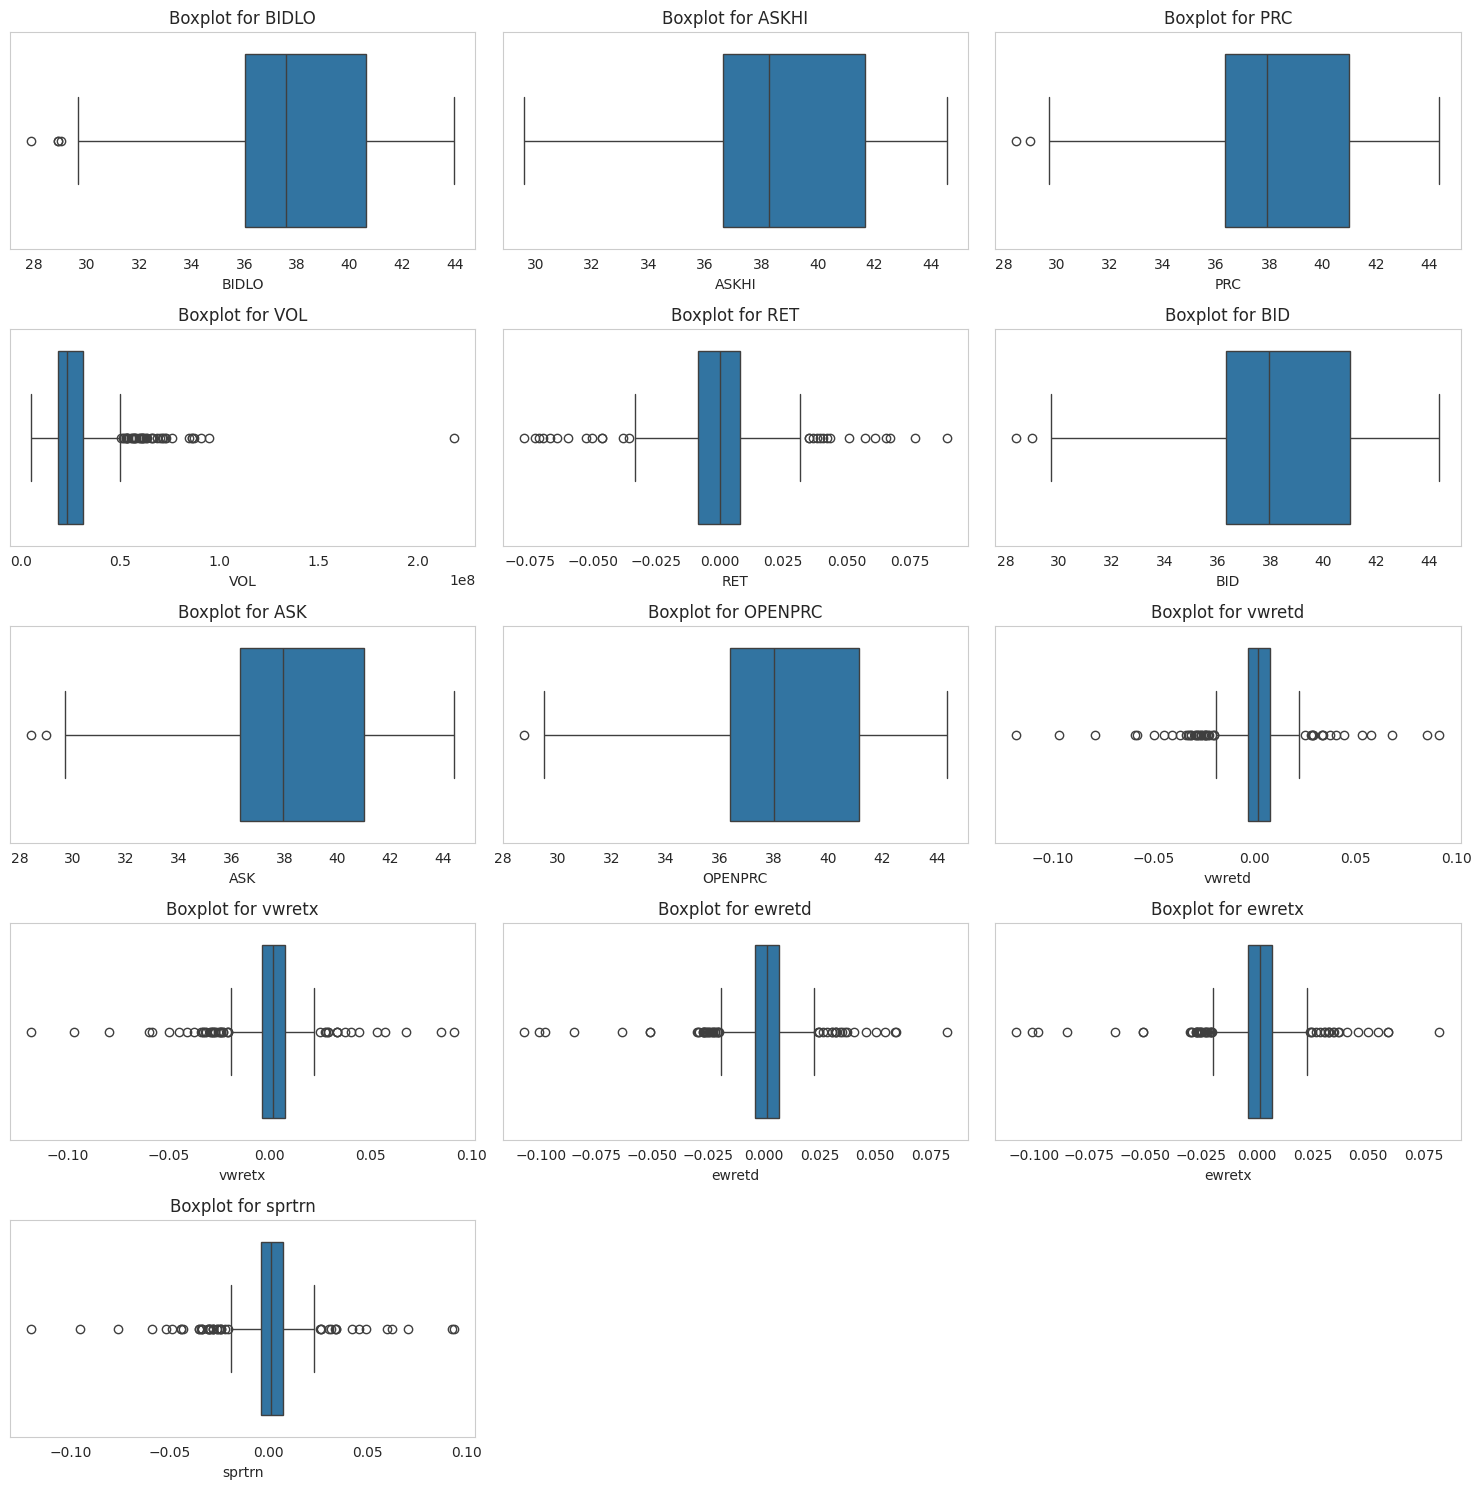

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

# Iterate through each numerical variable and plot a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 4 columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

For the features such as trading volume (VOL), return (RET), value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn), there are ouliters that we need to pay attention to.If we check their validity further, we can figure out that,

*   VOL represents the trading volume. The outliers might indicate days of unusually high trading activity.
*   RET represents the return. Outliers might indicate extreme market conditions.
*   value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn) represents the value-weighted return, and the outliers might indicate extreme market conditions.


That's to say, the above abnormal values are consistent with the actual situation.

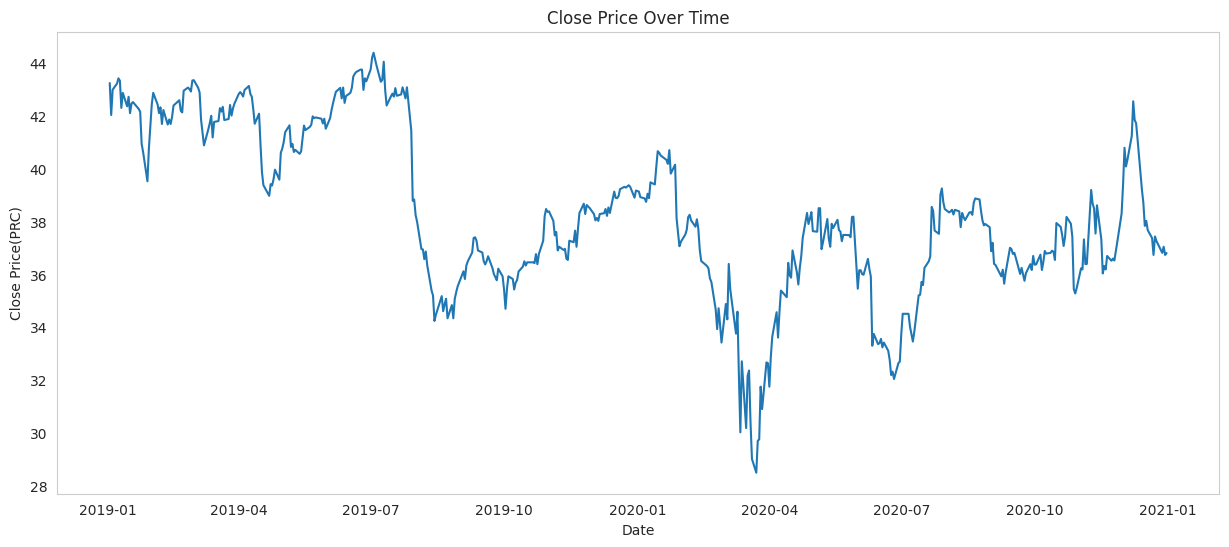

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['PRC'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price(PRC)')
plt.show()

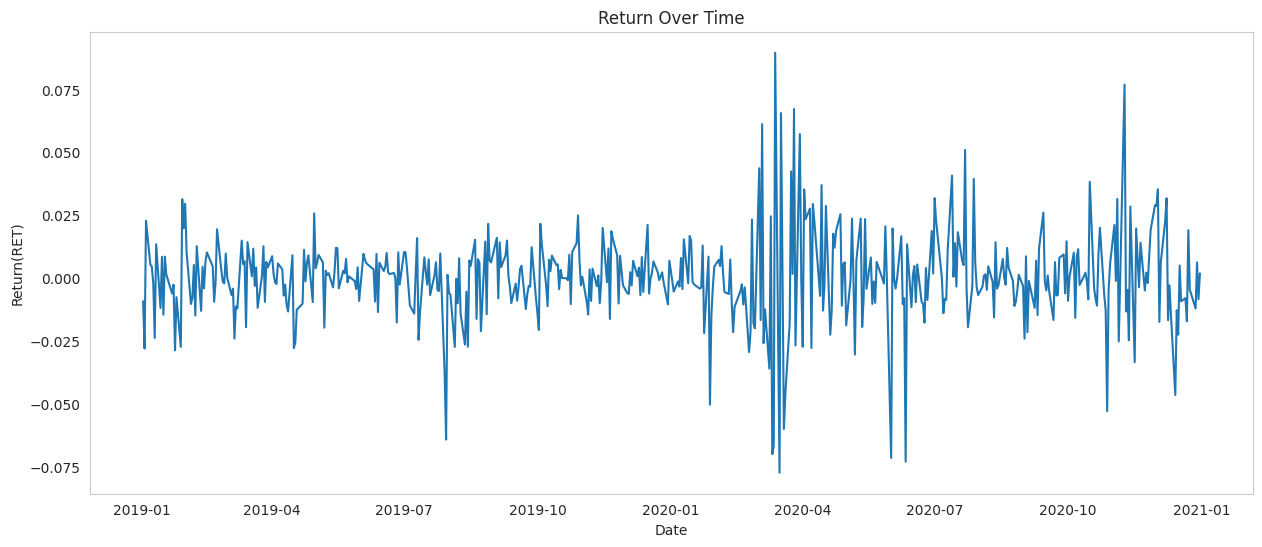

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['RET'])
plt.title('Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return(RET)')
plt.show()

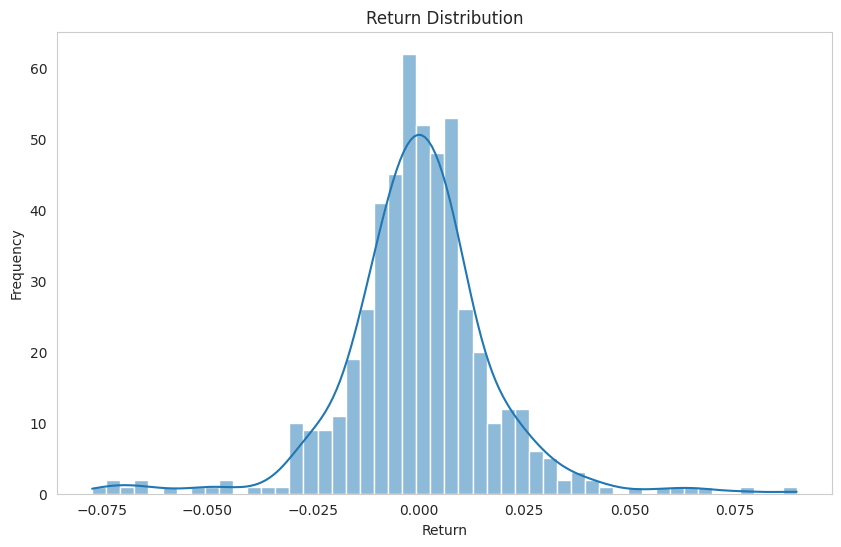

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RET'], bins=50, kde=True)
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

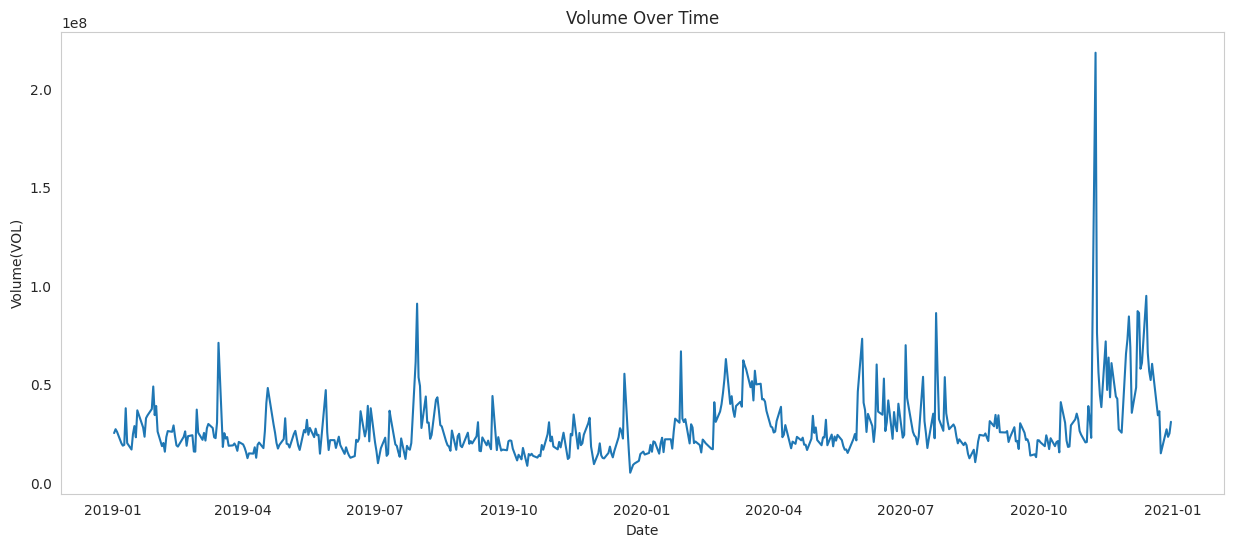

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['VOL'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume(VOL)')
plt.show()


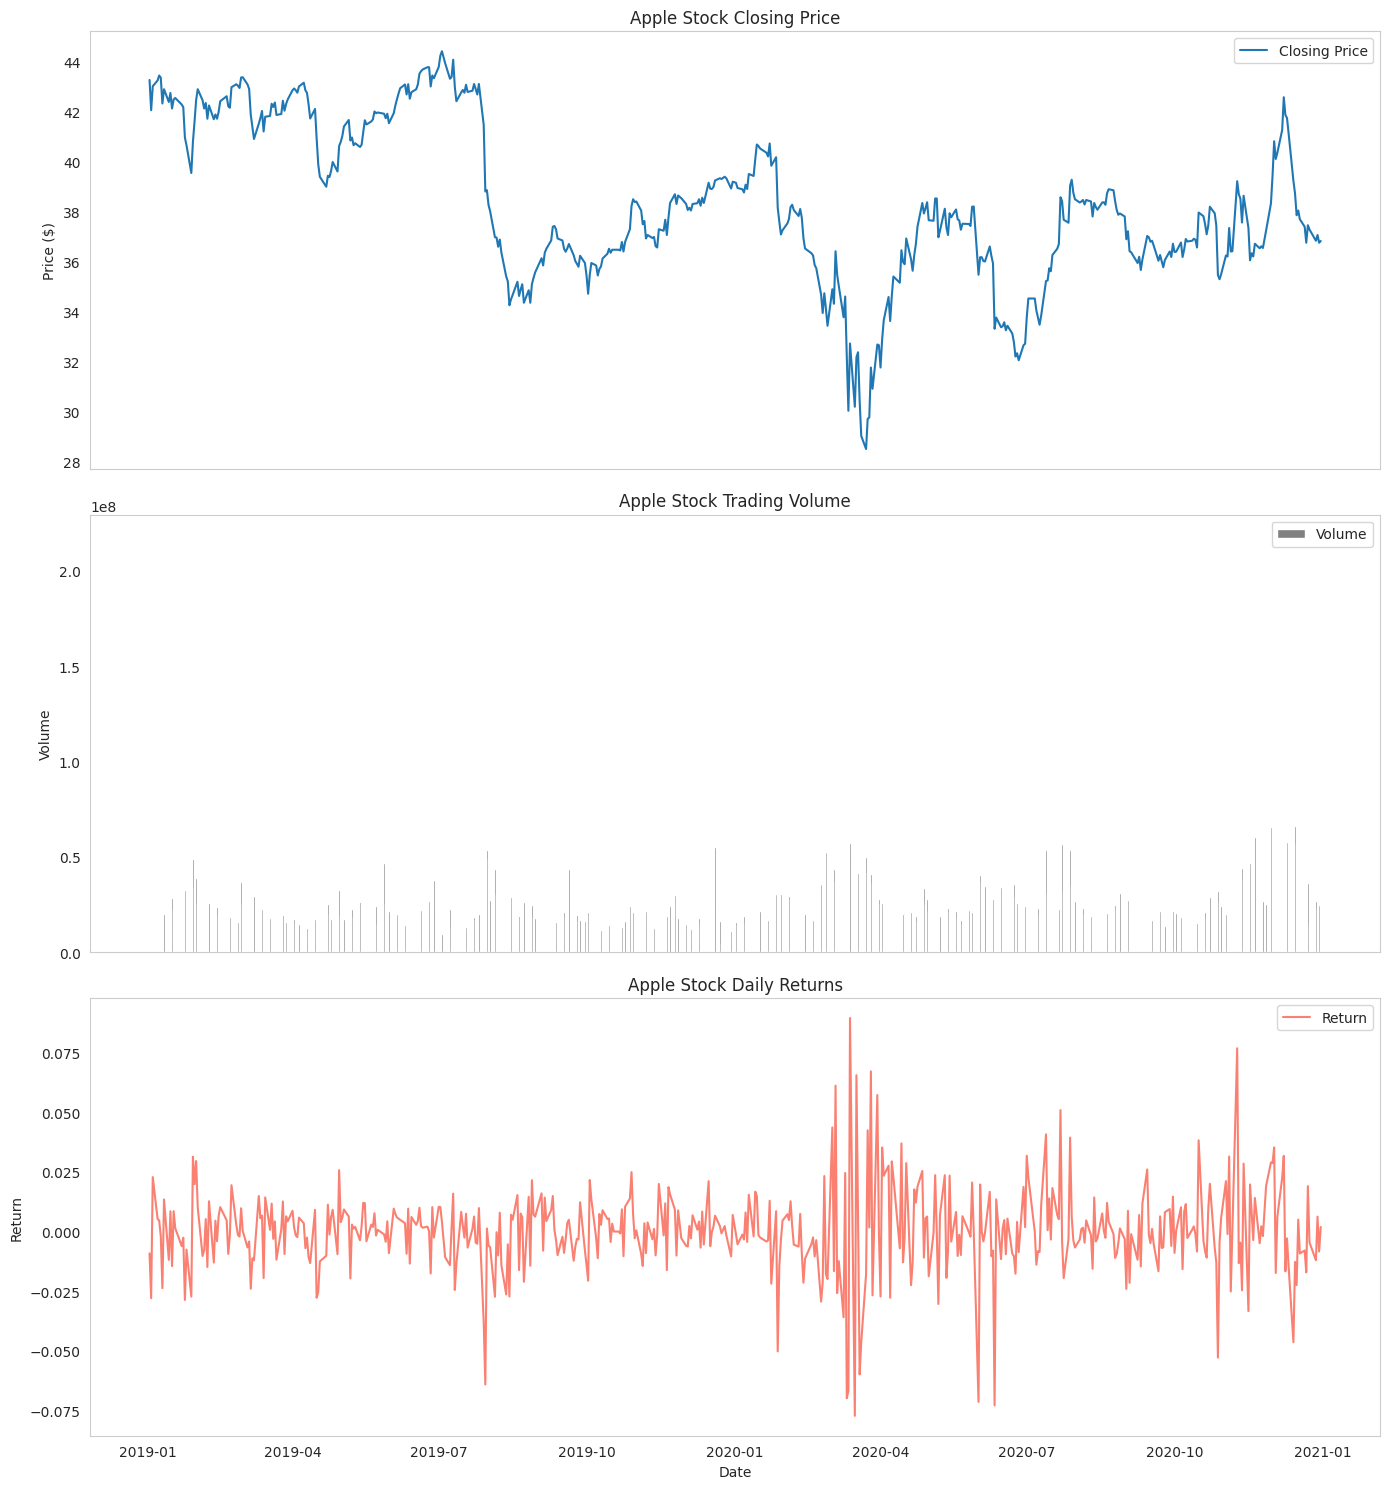

In [11]:
# Create a combined plot with three subplots on one figure, sharing the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot Closing Price on the first subplot
ax1.plot(df.index, df['PRC'], label='Closing Price')
ax1.set_title('Apple Stock Closing Price')
ax1.set_ylabel('Price ($)')
ax1.legend()

# Plot Volume on the second subplot
ax2.bar(df.index, df['VOL'], label='Volume', color='grey')
ax2.set_title('Apple Stock Trading Volume')
ax2.set_ylabel('Volume')
ax2.legend()

# Plot Returns on the third subplot
ax3.plot(df.index, df['RET'], label='Return', color='salmon')
ax3.set_title('Apple Stock Daily Returns')
ax3.set_ylabel('Return')
ax3.set_xlabel('Date')
ax3.legend()

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [12]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.4 MB/s eta 0:00:00


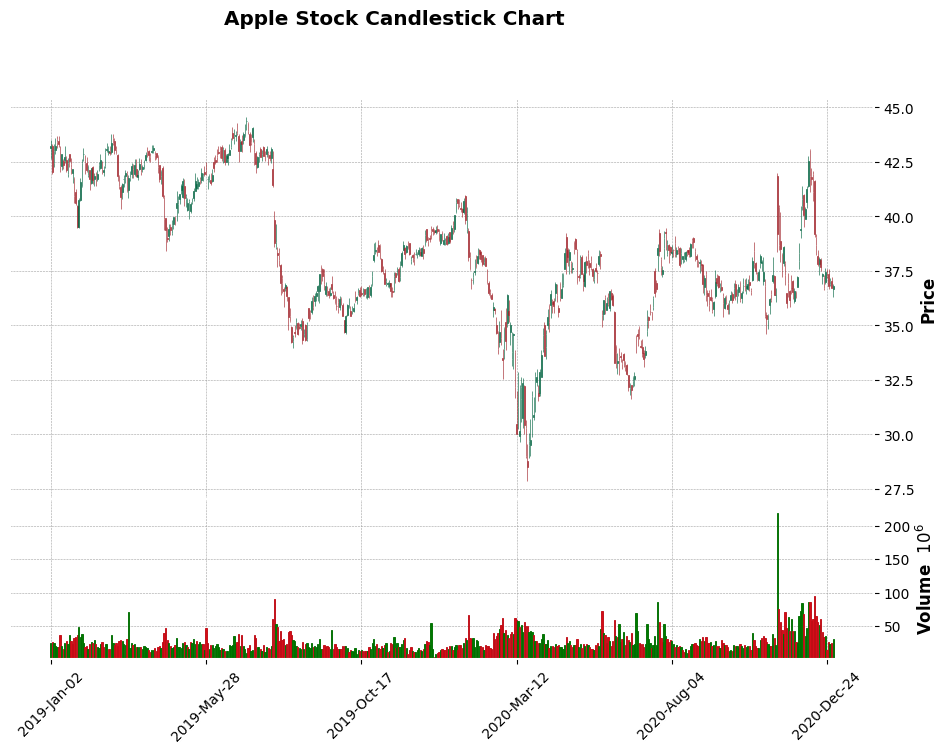

In [13]:
import mplfinance as mpf
temp_df = df.copy()
temp_df.rename(columns={
    'OPENPRC': 'Open',
    'ASKHI': 'High',
    'BIDLO': 'Low',
    'PRC': 'Close',
    'VOL': 'Volume'
}, inplace=True)

# Create a candlestick chart with volume using the temporary DataFrame
mpf.plot(temp_df[['Open', 'High', 'Low', 'Close', 'Volume']],
         type='candle',
         style='charles',
         title='Apple Stock Candlestick Chart',
         volume=True,
         figsize=(12, 8))

# Display the plot
mpf.show()


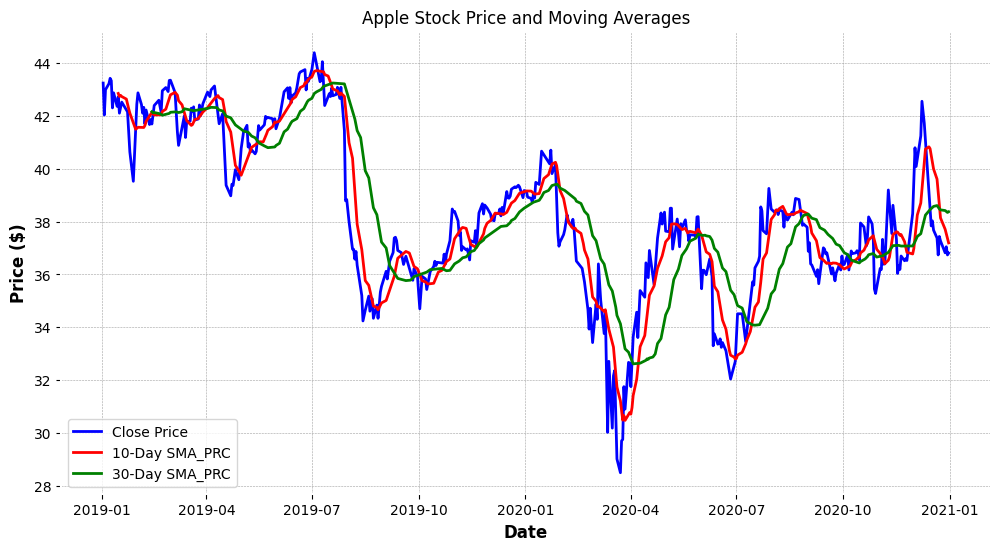

In [14]:
df['SMA_10_PRC'] = df['PRC'].rolling(window=10).mean()
df['SMA_30_PRC'] = df['PRC'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRC'], label='Close Price', color='blue')
plt.plot(df.index, df['SMA_10_PRC'], label='10-Day SMA_PRC', color='red')
plt.plot(df.index, df['SMA_30_PRC'], label='30-Day SMA_PRC', color='green')

# Adding titles and labels
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


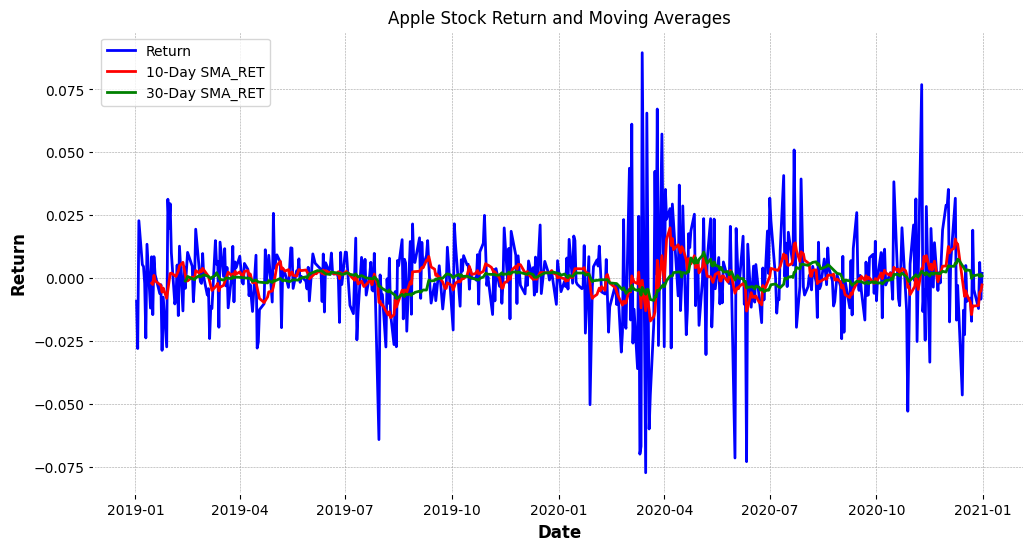

In [15]:
df['SMA_10_RET'] = df['RET'].rolling(window=10).mean()
df['SMA_30_RET'] = df['RET'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RET'], label='Return', color='blue')
plt.plot(df.index, df['SMA_10_RET'], label='10-Day SMA_RET', color='red')
plt.plot(df.index, df['SMA_30_RET'], label='30-Day SMA_RET', color='green')

# Adding titles and labels
plt.title('Apple Stock Return and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


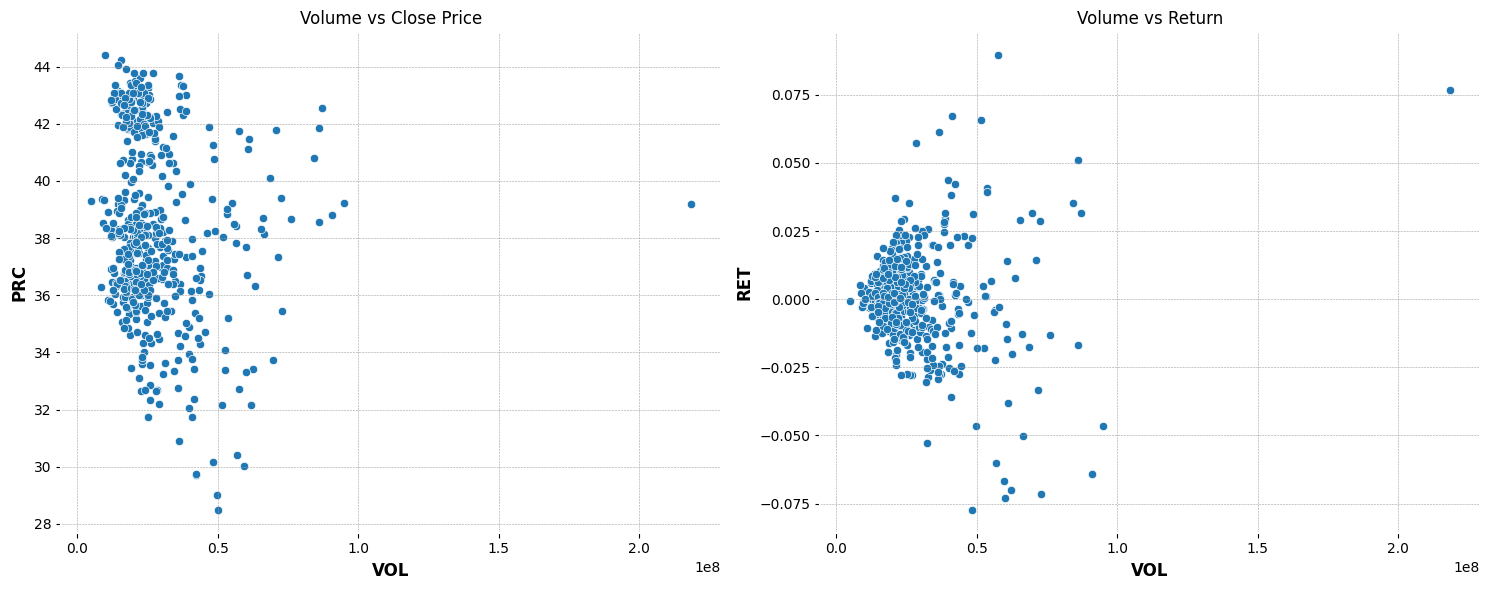

In [16]:
# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for 'Volume vs Close Price'
sns.scatterplot(x='VOL', y='PRC', data=df, ax=axes[0])
axes[0].set_title('Volume vs Close Price')

# Scatter plot for 'Volume vs Return'
sns.scatterplot(x='VOL', y='RET', data=df, ax=axes[1])
axes[1].set_title('Volume vs Return')

# Display the plots
plt.tight_layout()
plt.show()



*   Volume vs. Price




A high trading volume can be associated with significant price events like earnings announcements or other market news, which could explain the spread in prices at higher volumes. If prices are generally higher at higher volumes, it may suggest periods of bullish sentiment, whereas lower volumes might indicate less trading confidence or interest.
*   Volume vs. Return

While volume increases may correspond to more significant price movements (not necessarily leading to positive returns), the overall returns do not dramatically shift from zero. It suggests that higher volumes are not consistently associated with positive or negative returns but rather with increased activity that could go either way, depending on other market conditions or news.



In [17]:
df.drop(columns=['SMA_10_PRC', 'SMA_30_PRC', 'SMA_10_RET', 'SMA_30_RET'], inplace=True)

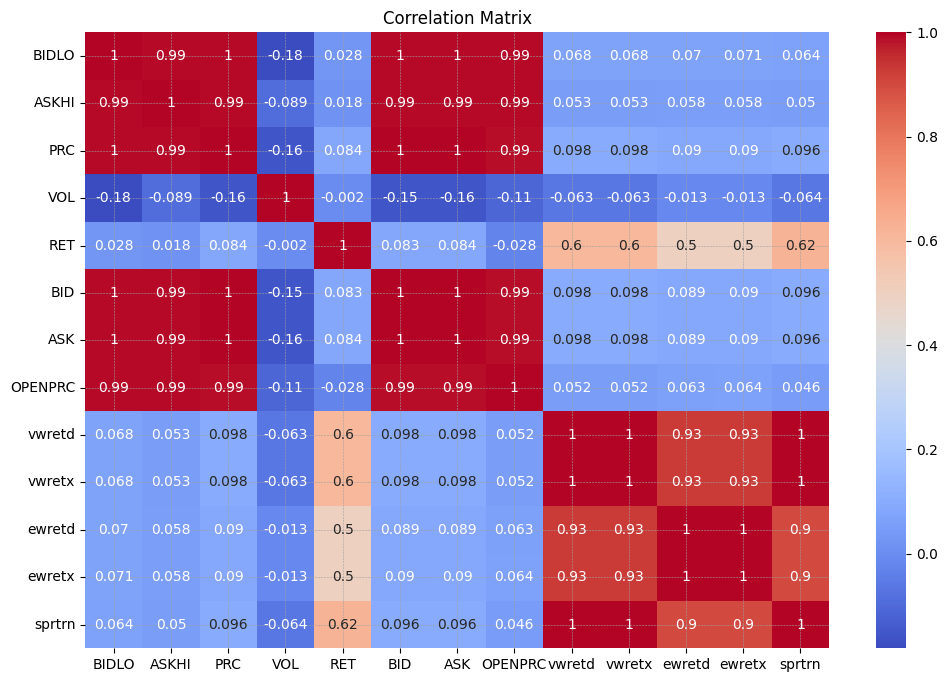

In [18]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for VIF calculation (necessary as VIF assumes a model intercept)
numeric_df = add_constant(numeric_df)

# Calculate VIF values
VIFs = pd.Series([variance_inflation_factor(numeric_df.values, i)
                  for i in range(numeric_df.shape[1])],
                 index=numeric_df.columns)

# Print VIF values
print("Variance Inflation Factors:")
print(VIFs)

Variance Inflation Factors:
const         191.033407
BIDLO         276.260719
ASKHI         253.776486
PRC         45753.779179
VOL             2.220665
RET             3.318535
BID        260516.880778
ASK        293963.910574
OPENPRC       194.387610
vwretd      87094.310676
vwretx      88296.300596
ewretd      68632.525190
ewretx      68587.967933
sprtrn        405.219012
dtype: float64


# Prediction with Close Price (PRC)

In [20]:
df_prc = df[['PRC']]
df_prc.head(10)


PRC
date             
2019-01-02  43.25
2019-01-03  42.04
2019-01-04  43.00
2019-01-07  43.23
2019-01-08  43.43
2019-01-09  43.34
2019-01-10  42.31
2019-01-11  42.88
2019-01-14  42.37
2019-01-15  42.73

In [21]:
from sklearn.preprocessing import MinMaxScaler
import datetime

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled_prc = pd.DataFrame(scaler.fit_transform(df_prc), columns=df_prc.columns, index=df_prc.index)

In [22]:
def window_dataset(data, first_date_str, last_date_str, target_col='PRC', time_step=1):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    dates, X, y = [], [], []

    target_date = first_date
    while target_date <= last_date:
        if target_date not in data.index:
            target_date += datetime.timedelta(days=1)
            continue

        start_idx = data.index.get_loc(target_date)
        if start_idx + time_step + 1 >= len(data):
            break

        X.append(data.iloc[start_idx:start_idx + time_step].values)
        y.append(data.iloc[start_idx + time_step][target_col])
        dates.append(target_date)

        next_week = data.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            break

        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if target_date == last_date:
            break

        target_date = next_date

    return np.array(dates), np.array(X).astype(np.float32), np.array(y).astype(np.float32)


In [23]:
time_step = 90 #Adjust as needed for actural data
dates, X, y = window_dataset(df_scaled_prc, '2019-01-02', '2020-12-31', target_col='PRC', time_step = time_step)
print("Dates:", dates.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)

Dates: (414,)
X shape: (414, 90, 1)
y shape: (414,)


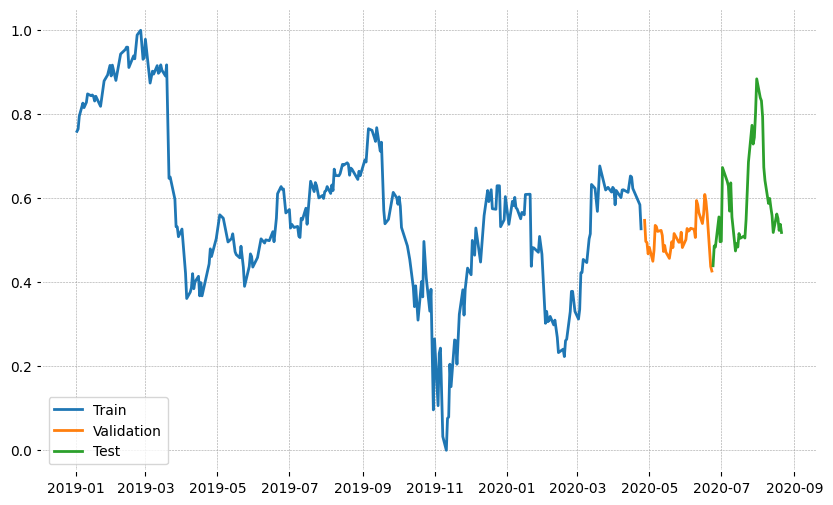

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_performance(true_values, predictions, dataset_type="Dataset"):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)

    print(f"{dataset_type} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print("")

## ARIMA Prediction



In [26]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def evaluate_arima_model(order):
    # Fit ARIMA model
    train_series = pd.Series(y_train, index=dates_train)
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Forecasting beyond the training data
    n_forecast_val = len(dates_val)

    # Get forecast for validation set
    val_forecast = model_fit.get_forecast(steps=n_forecast_val)
    val_pred = val_forecast.predicted_mean

    # Inverse transform the predictions
    val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # Calculate MSE and MAE for validation set
    val_mse = mean_squared_error(y_val_inv, val_pred_inv)
    val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

    return val_mse, val_mae

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            try:
                mse, mae = evaluate_arima_model(order)
                if mse < best_mse:
                    best_mse = mse
                    best_mae = mae
                    best_order = order
                print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')
            except:
                continue

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')

Order (0, 0, 0) - Validation MSE: 1.211087441300096, Validation MAE: 0.9620916686964593
Order (0, 0, 1) - Validation MSE: 1.2137603109431734, Validation MAE: 0.9606598124248813
Order (0, 0, 2) - Validation MSE: 1.2019469453629774, Validation MAE: 0.9579642857159837
Order (0, 0, 3) - Validation MSE: 1.1807243001358558, Validation MAE: 0.9441039531708282
Order (0, 0, 4) - Validation MSE: 1.1329115668300624, Validation MAE: 0.913743984788787
Order (0, 0, 5) - Validation MSE: 1.0946823347738737, Validation MAE: 0.8934570032707482
Order (0, 1, 0) - Validation MSE: 0.5024514341332026, Validation MAE: 0.5704880239759976
Order (0, 1, 1) - Validation MSE: 0.5691475793221872, Validation MAE: 0.6229730569794665
Order (0, 1, 2) - Validation MSE: 0.5327014134600981, Validation MAE: 0.5942712599026532
Order (0, 1, 3) - Validation MSE: 0.5052382507466846, Validation MAE: 0.5712164331355967
Order (0, 1, 4) - Validation MSE: 0.5215879745503701, Validation MAE: 0.5848938966565402
Order (0, 1, 5) - Valid

In [27]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_train, index=dates_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

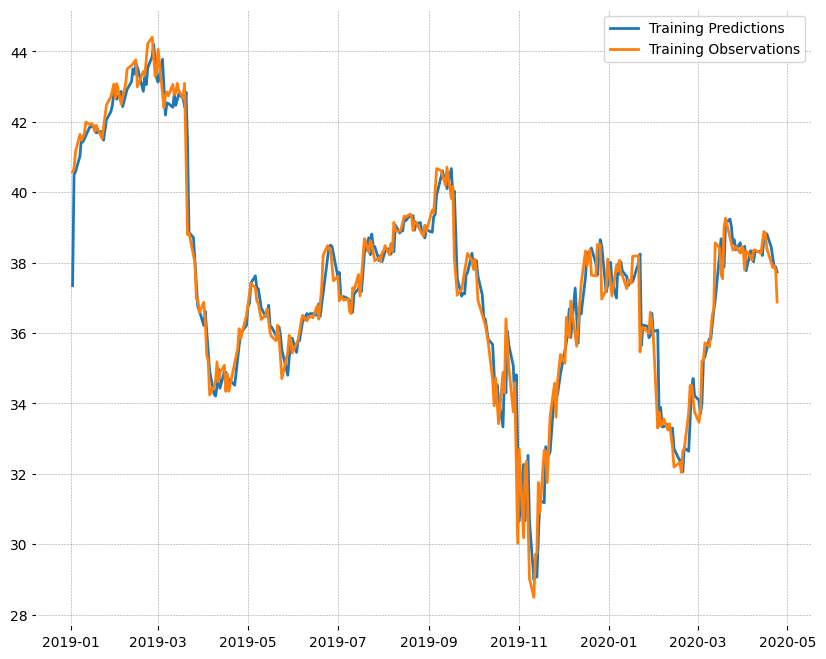

ARIMA Training Performance:
MSE: 0.44587047535076174
RMSE: 0.6677353333101085
MAE: 0.4572375361355956



In [28]:
# Predicting and inverse transforming for training data
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')
train_arima_inv = scaler.inverse_transform(train_predictions_arima.values.reshape(-1, 1)).flatten()
y_train_arima_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_arima_inv)
plt.plot(dates_train, y_train_arima_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_arima_inv, train_arima_inv, "ARIMA Training")

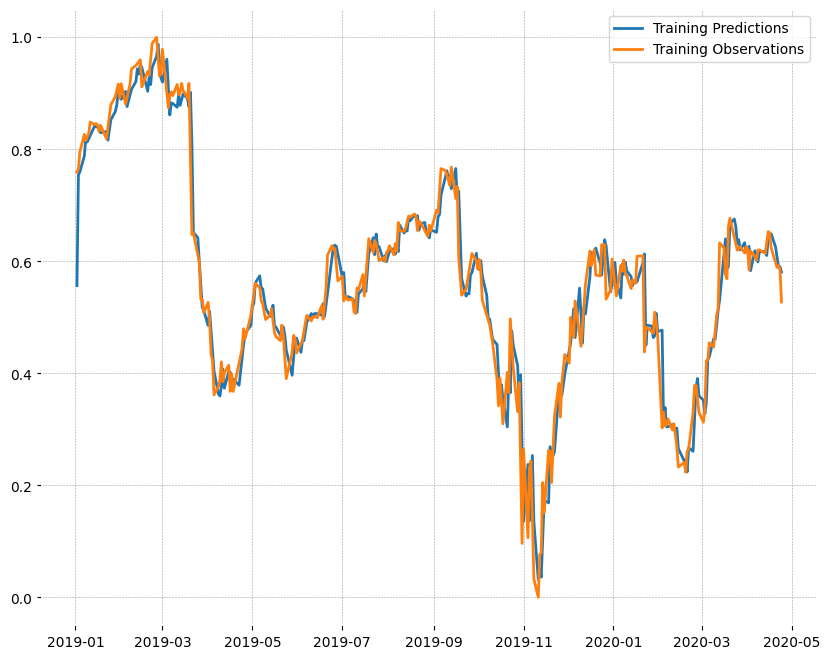

ARIMA Training Performance:
MSE: 0.0017614425008237935
RMSE: 0.04196954253769981
MAE: 0.02873901055339605



In [29]:
# Predicting for training data without inverse transforming
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_arima.values)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_train, train_predictions_arima.values, "ARIMA Training")


In [30]:
n_forecast_val = len(dates_val)
n_forecast_test = len(dates_test)

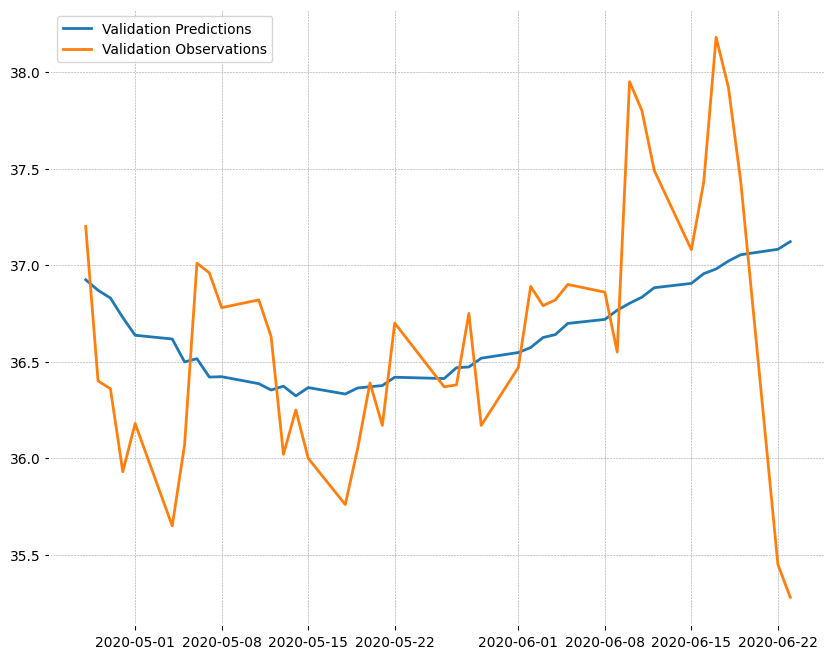

ARIMA Validation Performance:
MSE: 0.39081187006409585
RMSE: 0.6251494781762965
MAE: 0.4762561163071554



In [31]:
# Predicting and inverse transforming for validation data
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean
val_arima_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
y_val_arima_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_arima_inv)
plt.plot(dates_val, y_val_arima_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_arima_inv, val_arima_inv, "ARIMA Validation")

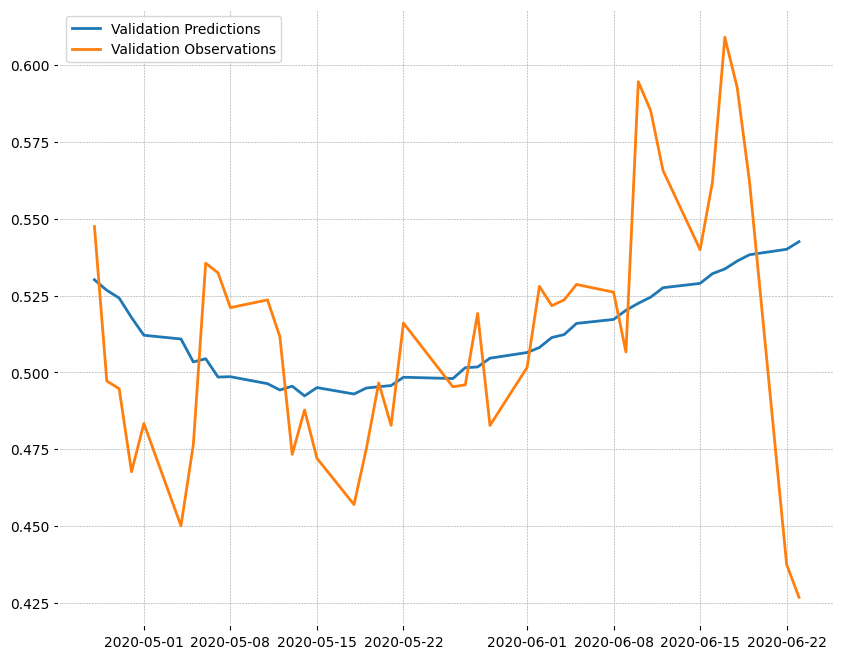

ARIMA Validation Performance:
MSE: 0.0015439293434158766
RMSE: 0.039292866317130345
MAE: 0.029934385579469907



In [32]:
# Predicting for validation data without inverse transforming
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_pred.values)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_val, val_pred.values, "ARIMA Validation")


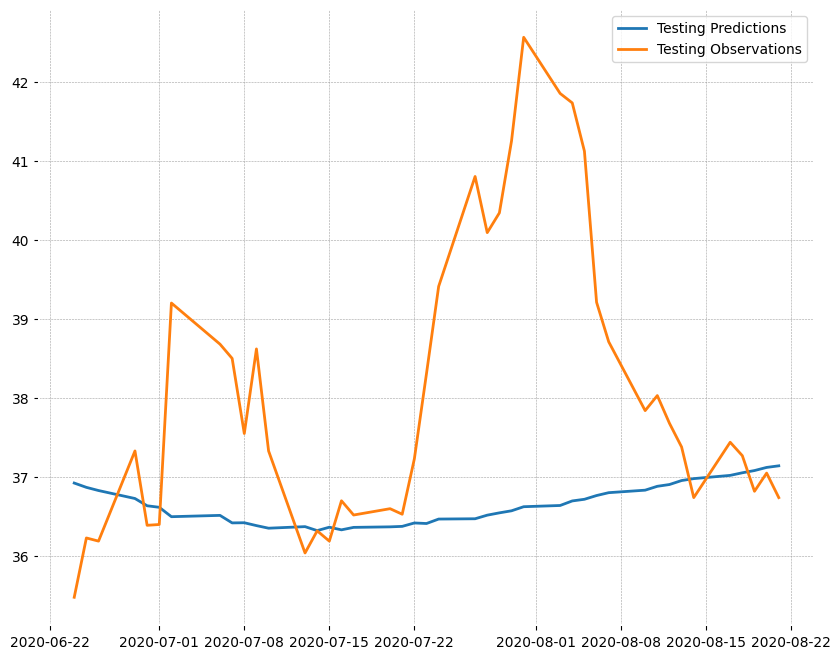

ARIMA Testing Performance:
MSE: 5.4334072903825135
RMSE: 2.3309670290208984
MAE: 1.628566599471838



In [33]:
# Predicting and inverse transforming for test data
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean
test_arima_inv = scaler.inverse_transform(test_pred.values.reshape(-1, 1)).flatten()
y_test_arima_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_arima_inv)
plt.plot(dates_test, y_test_arima_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA Testing")

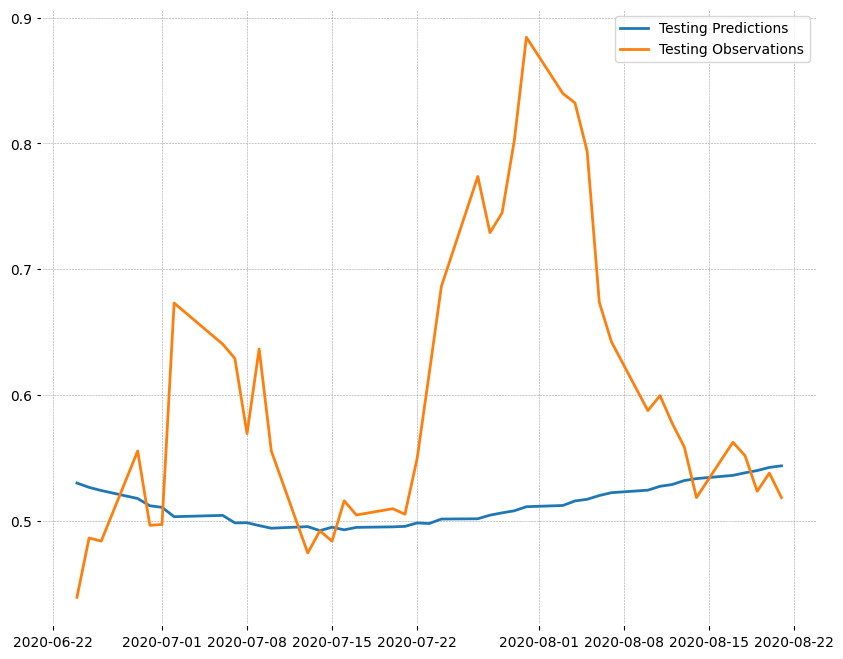

ARIMA Testing Performance:
MSE: 0.021465048768054624
RMSE: 0.1465095517980129
MAE: 0.10236120468123036



In [34]:
# Predicting for test data without inverse transforming
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean

# Plotting test data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_pred.values)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_test, test_pred.values, "ARIMA Testing")


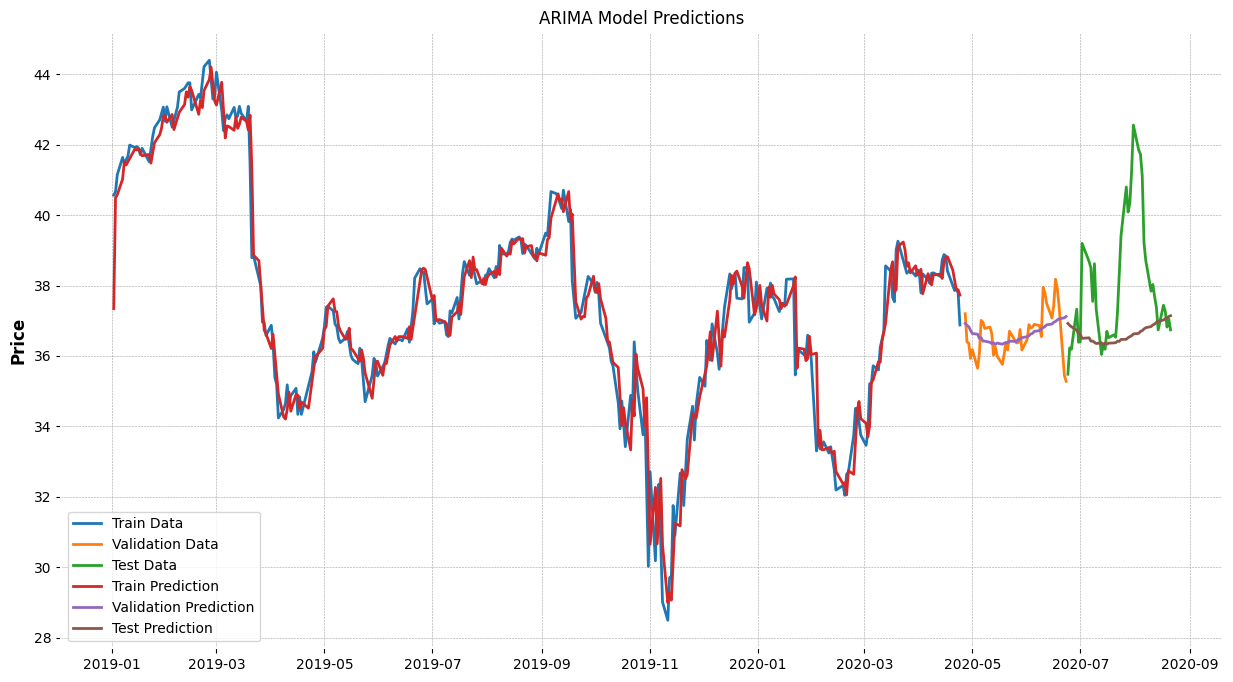

In [35]:
# Plot the predictions
plt.figure(figsize=(15, 8))
plt.plot(dates_train, y_train_arima_inv, label='Train Data')
plt.plot(dates_val, y_val_arima_inv, label='Validation Data')
plt.plot(dates_test, y_test_arima_inv, label='Test Data')
plt.plot(dates_train, train_arima_inv, label='Train Prediction')
plt.plot(dates_val, val_arima_inv, label='Validation Prediction')
plt.plot(dates_test, test_arima_inv, label='Test Prediction')
plt.title('ARIMA Model Predictions')
plt.ylabel('Price')
plt.legend()
plt.show()


## LSTM Prediction

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((90, 1)),
            layers.LSTM(64),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
          ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.3347 - mean_absolute_error: 0.5448 - val_loss: 0.1197 - val_mean_absolute_error: 0.3434
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1167 - mean_absolute_error: 0.2921 - val_loss: 0.0159 - val_mean_absolute_error: 0.1178
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.1177 - val_loss: 0.0025 - val_mean_absolute_error: 0.0392
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0184 - mean_absolute_error: 0.1063 - val_loss: 0.0029 - val_mean_absolute_error: 0.0420
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0869 - val_loss: 0.0055 - val_mean_absolute_error: 0.0621
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0130 - mean_absolute_error: 0.0873 - val_loss: 0.0028 - val_mean_absolute_error: 0.0389
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0733 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


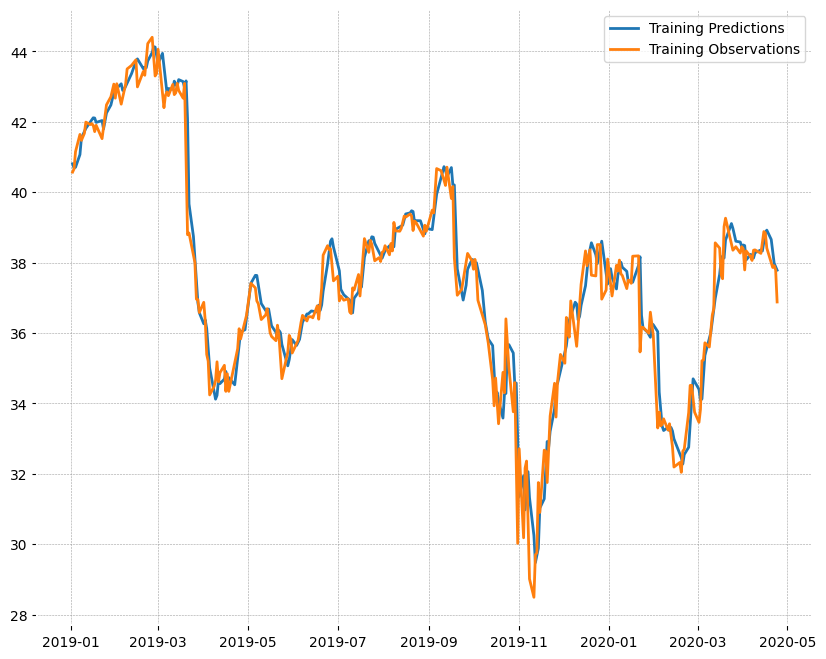

LSTM Training Performance:
MSE: 0.4540010094642639
RMSE: 0.6737959980964661
MAE: 0.45525598526000977



In [37]:
# Predicting and inverse transforming for training data
train_predictions = model.predict(X_train).flatten()
train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_inv)
plt.plot(dates_train, y_train_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train_inv, train_predictions_inv, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


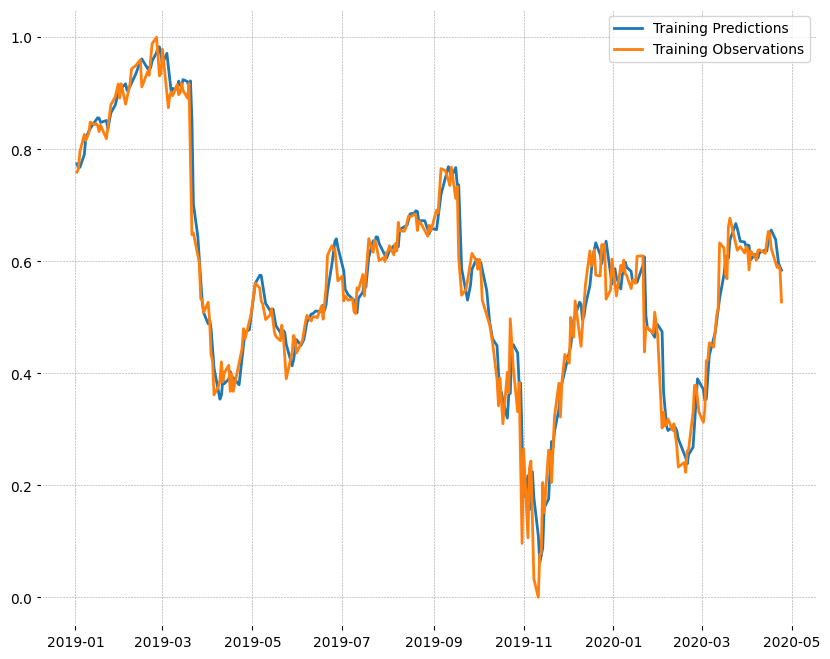

LSTM Training Performance:
MSE: 0.0017935631331056356
RMSE: 0.04235047847032547
MAE: 0.028614461421966553



In [38]:
# Predicting training data without inverse transforming
train_predictions = model.predict(X_train).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train, train_predictions, "LSTM Training")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


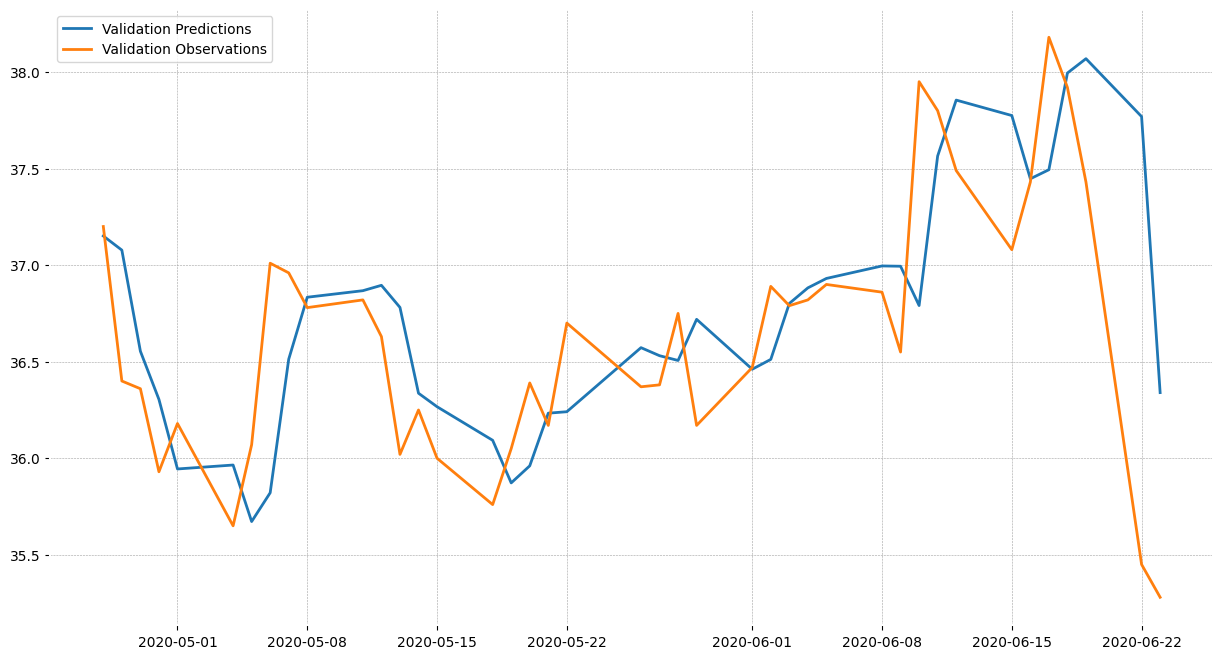

LSTM Validation Performance:
MSE: 0.3422393202781677
RMSE: 0.5850122570991516
MAE: 0.3973787724971771



In [39]:
# Predicting and inverse transforming for validation data
val_predictions = model.predict(X_val).flatten()
val_predictions_inv = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions_inv)
plt.plot(dates_val, y_val_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val_inv, val_predictions_inv, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


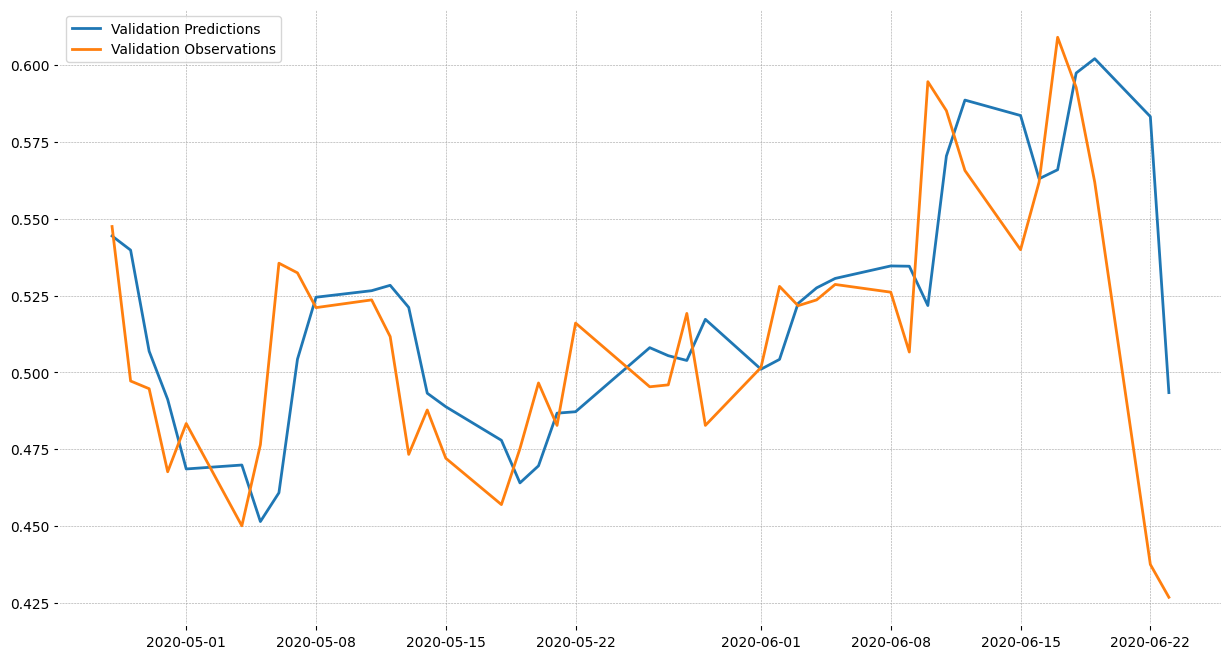

LSTM Validation Performance:
MSE: 0.0013520396314561367
RMSE: 0.03677009046077728
MAE: 0.024976661428809166



In [40]:
# Predicting validation data without inverse transforming
val_predictions = model.predict(X_val).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val, val_predictions, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


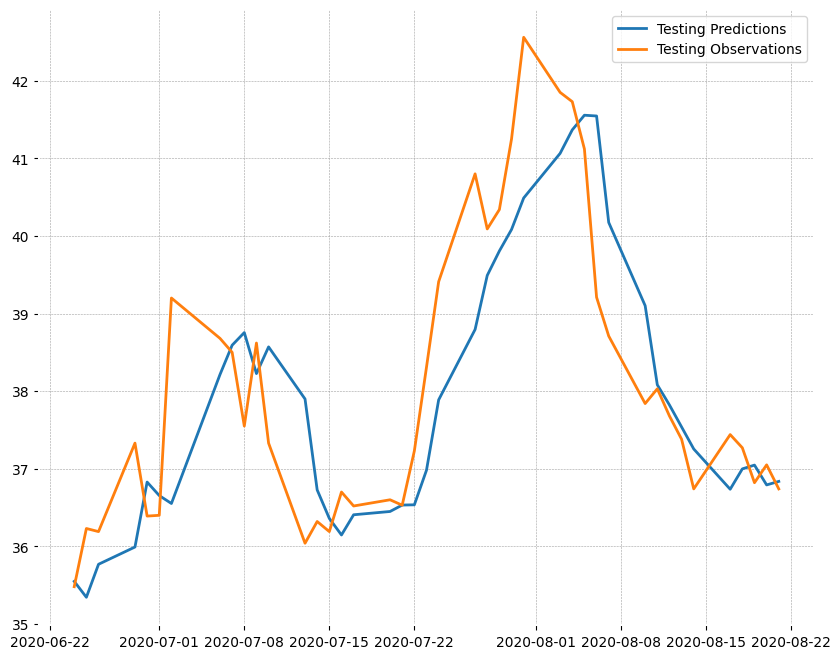

LSTM Testing Performance:
MSE: 1.0335748195648193
RMSE: 1.016648769378662
MAE: 0.7547475695610046



In [41]:
# Predicting and inverse transforming for test data
test_predictions = model.predict(X_test).flatten()
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_inv)
plt.plot(dates_test, y_test_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


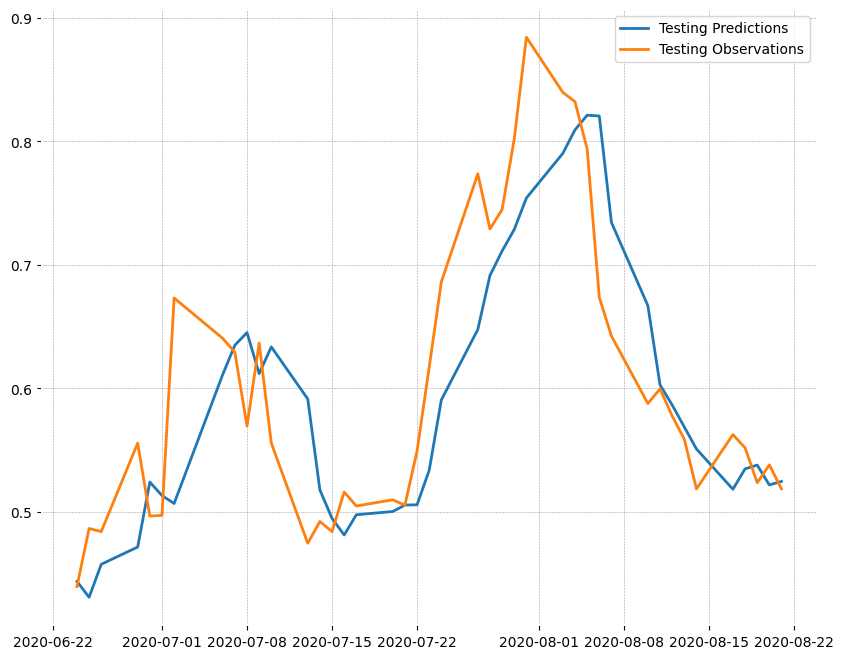

LSTM Testing Performance:
MSE: 0.004083205014467239
RMSE: 0.06389996409416199
MAE: 0.047438520938158035



In [42]:
# Predicting for test data without inverse transforming
test_predictions = model.predict(X_test).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

evaluate_performance(y_test, test_predictions, "LSTM Testing")


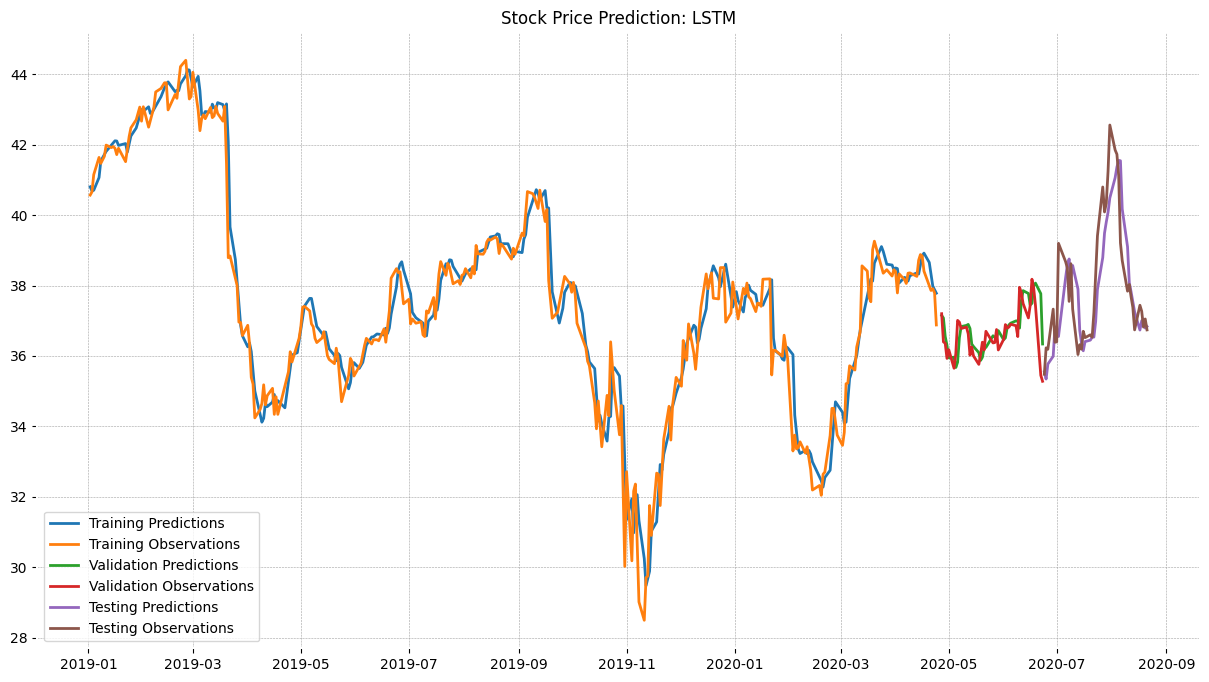

In [43]:
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_predictions_inv, label='Training Predictions')
plt.plot(dates_train, y_train_inv, label='Training Observations')
plt.plot(dates_val, val_predictions_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_inv, label='Validation Observations')
plt.plot(dates_test, test_predictions_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.title('Stock Price Prediction: LSTM')
plt.legend()
plt.show()

## SVR Prediction

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# Combine train and validation sets for hyperparameter tuning
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# # Reshape for GridSearchCV
X_train_val = X_train_val.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


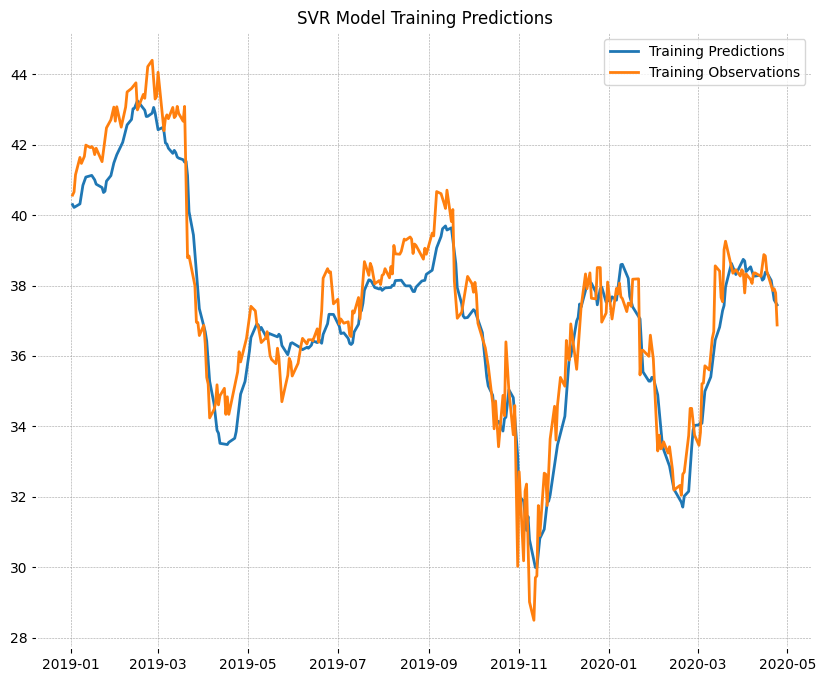

SVR Training Performance:
MSE: 0.7931374496808892
RMSE: 0.8905826461821997
MAE: 0.7365456787200236



In [45]:
# Train predictions and evaluation
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))
train_svr_inv = scaler.inverse_transform(train_predictions_svr.reshape(-1, 1)).flatten()
y_train_svr_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_svr_inv)
plt.plot(dates_train, y_train_svr_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train_svr_inv, train_svr_inv, "SVR Training")

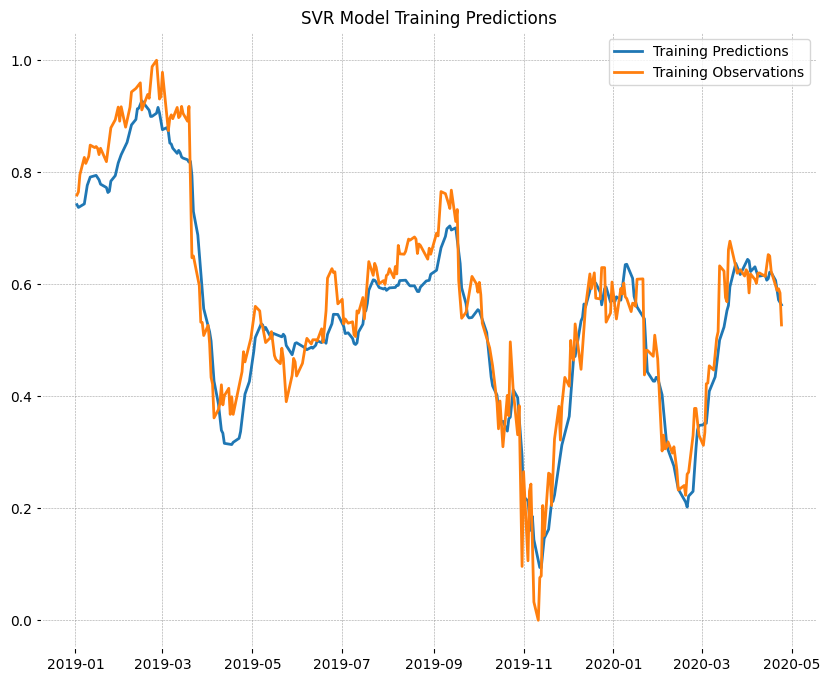

SVR Training Performance:
MSE: 0.003133344880934428
RMSE: 0.05597628855983958
MAE: 0.04629452000543054



In [46]:
# Train predictions and evaluation without inverse transforming
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_svr)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train, train_predictions_svr, "SVR Training")

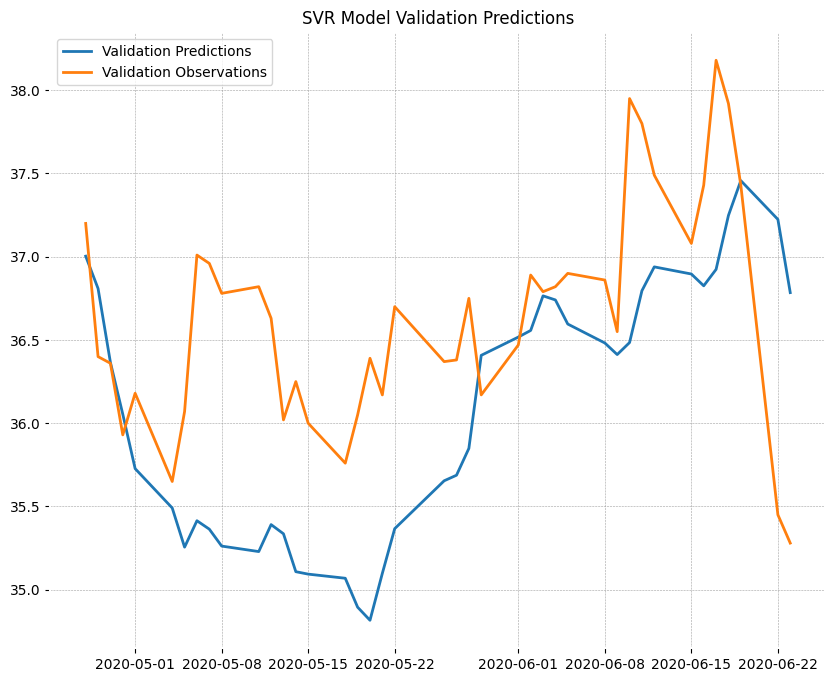

SVR Validation Performance:
MSE: 0.8761939905984651
RMSE: 0.9360523439415475
MAE: 0.7598556044453603



In [47]:
# Validation predictions and evaluation
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))
val_svr_inv = scaler.inverse_transform(val_predictions_svr.reshape(-1, 1)).flatten()
y_val_svr_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_svr_inv)
plt.plot(dates_val, y_val_svr_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val_svr_inv, val_svr_inv, "SVR Validation")

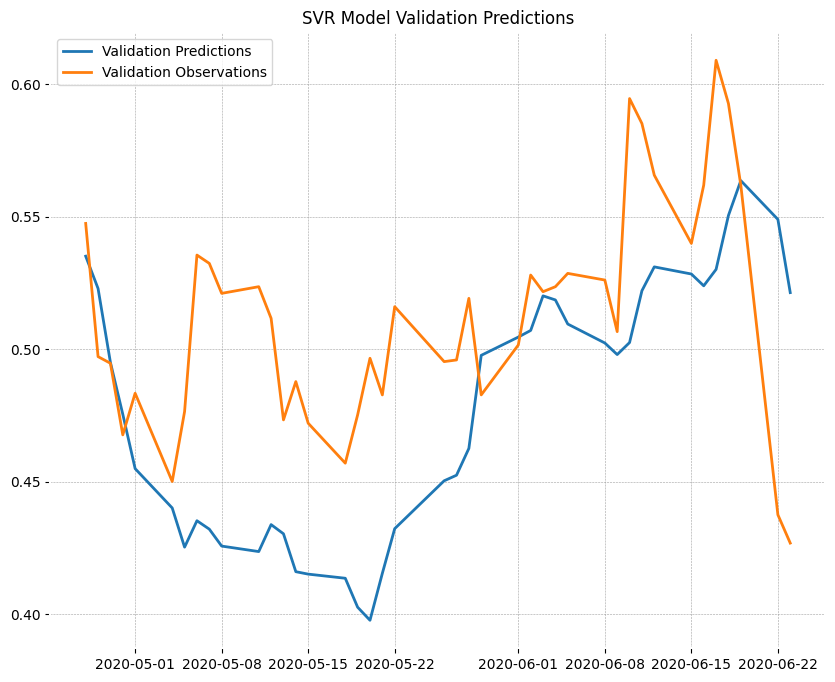

SVR Validation Performance:
MSE: 0.0034614659761232577
RMSE: 0.058834224530652714
MAE: 0.04775963104739274



In [48]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_predictions_svr)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val, val_predictions_svr, "SVR Validation")



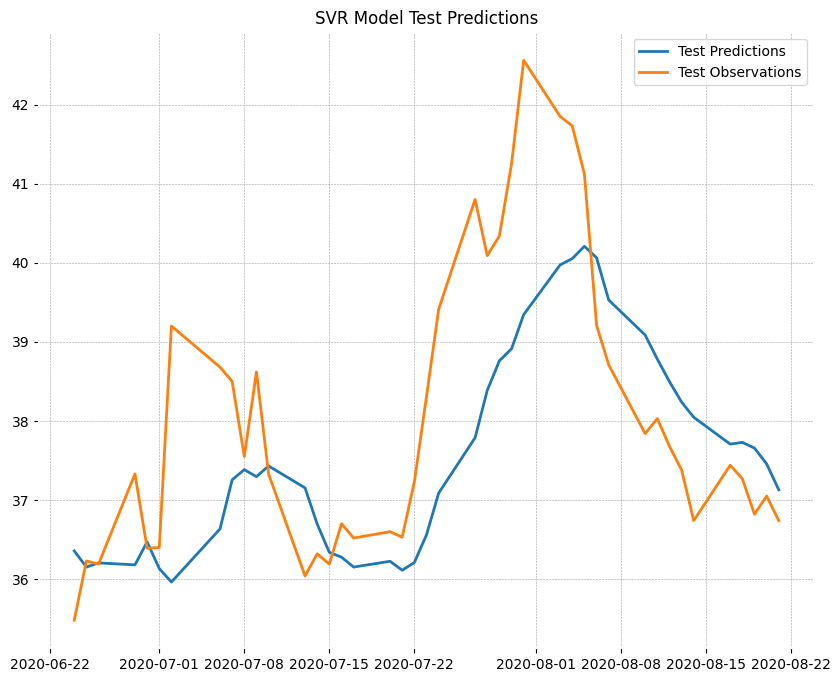

SVR Test Performance:
MSE: 1.8348850176900544
RMSE: 1.3545792770045075
MAE: 1.0528879239612183



In [49]:
# Test predictions and evaluation
test_predictions_svr = best_svr.predict(X_test)
test_svr_inv = scaler.inverse_transform(test_predictions_svr.reshape(-1, 1)).flatten()
y_test_svr_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_svr_inv)
plt.plot(dates_test, y_test_svr_inv)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR Test")

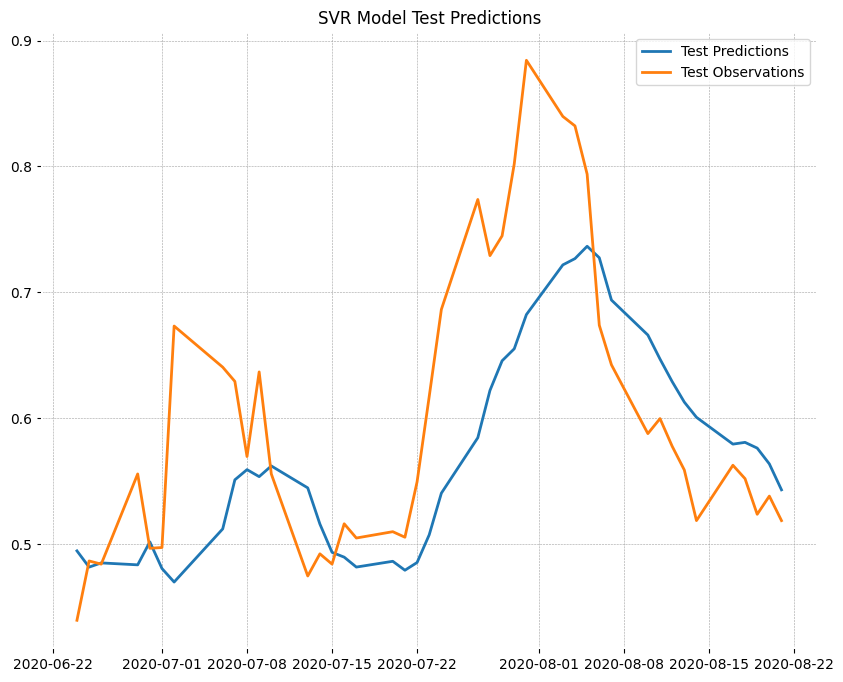

SVR Test Performance:
MSE: 0.0072488390158403585
RMSE: 0.08514011402294666
MAE: 0.06617774619817164



In [50]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr = best_svr.predict(X_test)

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_svr)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test, test_predictions_svr, "SVR Test")

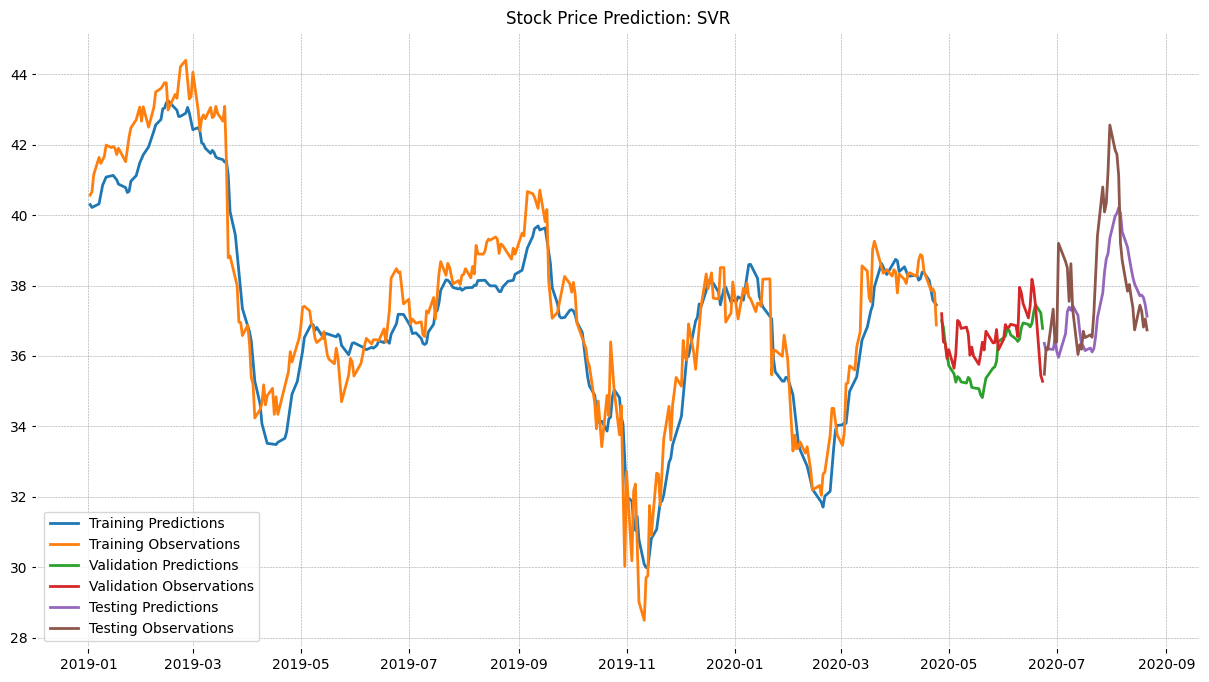

In [51]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_svr_inv, label='Training Predictions')
plt.plot(dates_train, y_train_svr_inv, label='Training Observations')
plt.plot(dates_val, val_svr_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_svr_inv, label='Validation Observations')
plt.plot(dates_test, test_svr_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_svr_inv, label='Testing Observations')
plt.title('Stock Price Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 5.4334072903825135
RMSE: 2.3309670290208984
MAE: 1.628566599471838

SVR Performance:
MSE: 1.8348850176900544
RMSE: 1.3545792770045075
MAE: 1.0528879239612183

LSTM Performance:
MSE: 1.0335748195648193
RMSE: 1.016648769378662
MAE: 0.7547475695610046



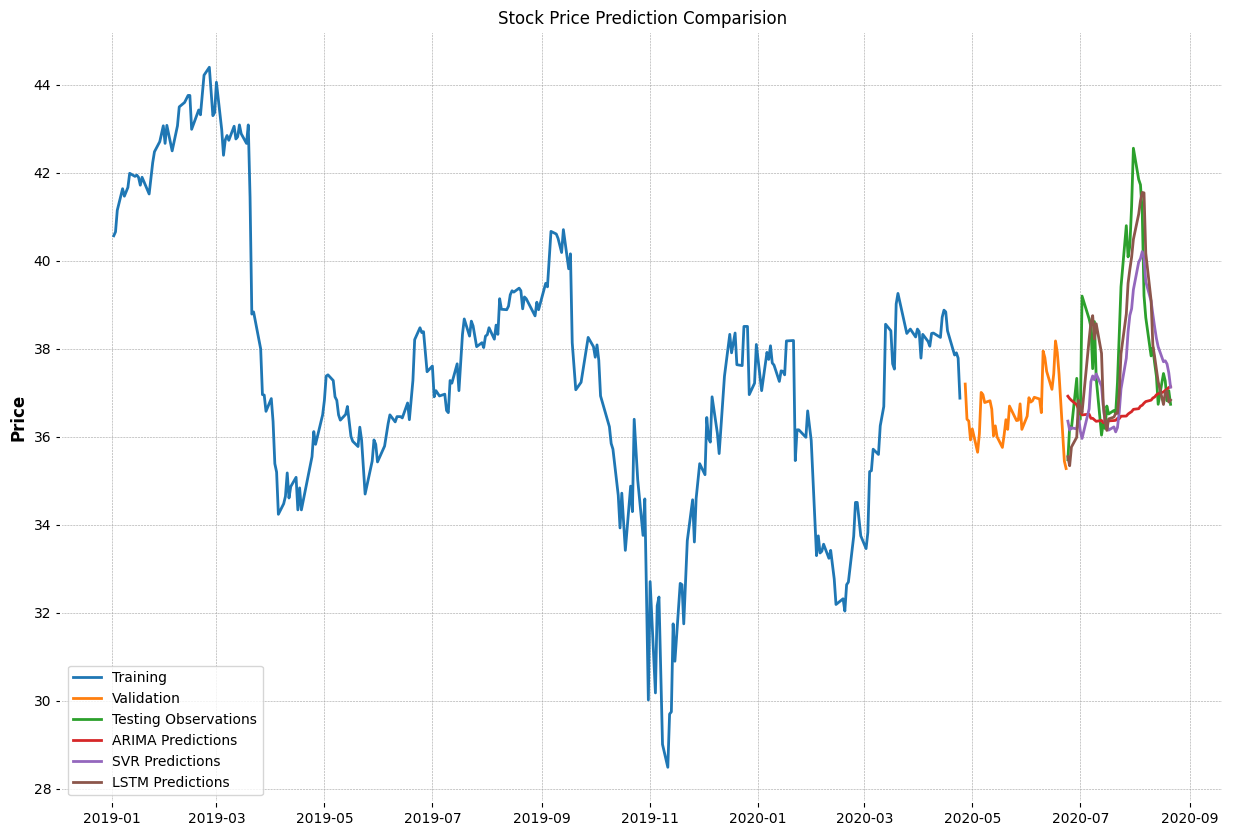

In [52]:
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA")
evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR")
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM")

plt.figure(figsize=(15, 10))
plt.plot(dates_train, y_train_inv, label='Training')
plt.plot(dates_val, y_val_inv, label='Validation')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparision')
plt.legend()
plt.ylabel('Price')
plt.show()

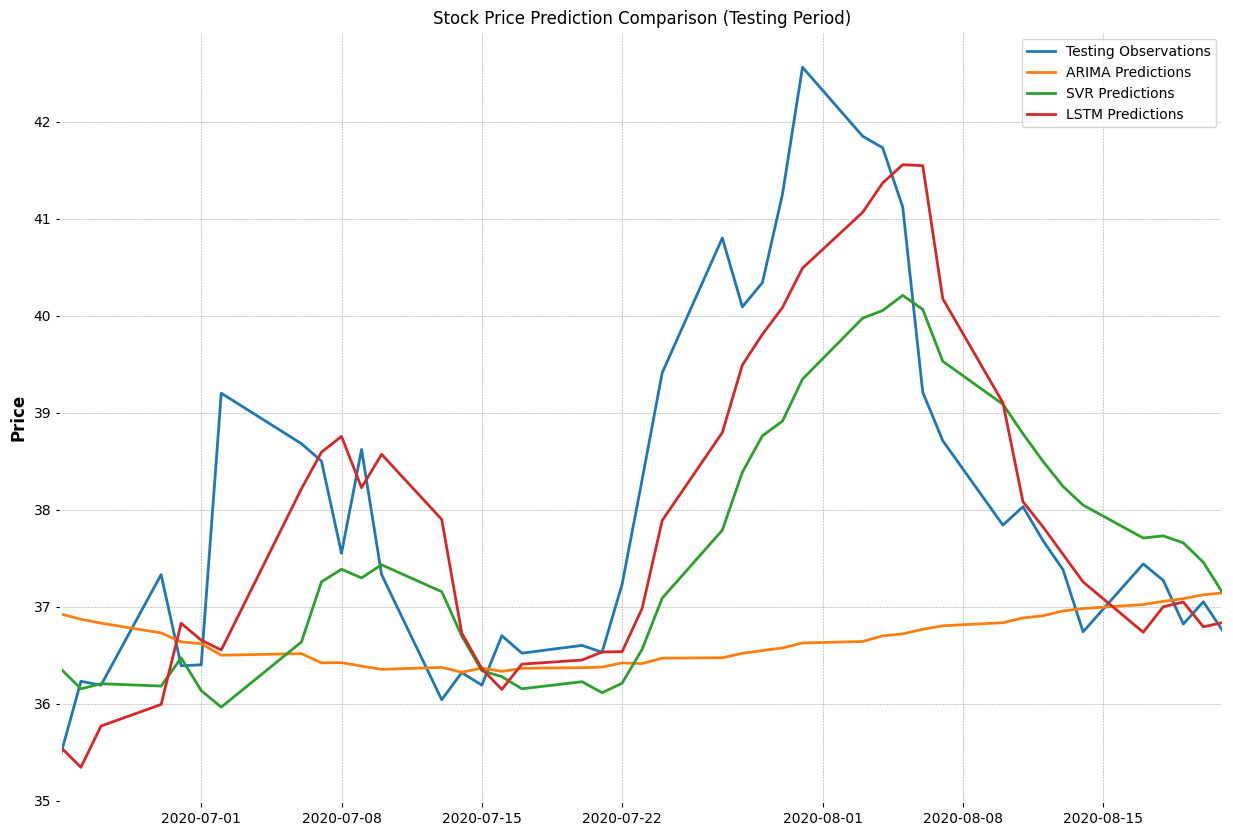

In [53]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('Price')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()

# Prediction with Return(RET)

In [54]:
df_ret = df[['RET']]
df_ret.head(10)

RET
date                
2019-01-02 -0.009164
2019-01-03 -0.027977
2019-01-04  0.022835
2019-01-07  0.005349
2019-01-08  0.004626
2019-01-09 -0.002072
2019-01-10 -0.023766
2019-01-11  0.013472
2019-01-14 -0.011894
2019-01-15  0.008497

In [55]:
# Normalize the data
scaler_ret = MinMaxScaler(feature_range=(0, 1))
df_scaled_ret = pd.DataFrame(scaler_ret.fit_transform(df_ret), columns=df_ret.columns, index=df_ret.index)

In [56]:
time_step_r = 90 #Adjust as needed for actural data
# dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2022-01-03', '2023-12-29', target_col='RET', time_step=time_step)
dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2019-01-02', '2020-12-31', target_col='RET', time_step=time_step_r)
print("Dates:", dates_r.shape)
print("X shape:", X_r.shape)
print("y shape:", y_r.shape)

Dates: (414,)
X shape: (414, 90, 1)
y shape: (414,)


In [57]:
# Split the dataset into training, validation, and test sets
dates_r_train, X_r_train, y_r_train = dates_r[:q_80], X_r[:q_80], y_r[:q_80]
dates_r_val, X_r_val, y_r_val = dates_r[q_80:q_90], X_r[q_80:q_90], y_r[q_80:q_90]
dates_r_test, X_r_test, y_r_test = dates_r[q_90:], X_r[q_90:], y_r[q_90:]


In [58]:
# Function to inverse transform predictions
def inverse_transform_predictions(predictions, original_data, scaler):
    dummy = np.zeros((predictions.shape[0], original_data.shape[1]))
    dummy[:, 0] = predictions
    inverse_transformed = scaler.inverse_transform(dummy)
    return inverse_transformed[:, 0]

## ARIMA Prediction

In [59]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
# Define a function to fit ARIMA model and return performance metrics
def evaluate_arima_model(order):
    try:
        # Fit ARIMA model
        train_series = pd.Series(y_r_train, index=dates_r_train)
        model = ARIMA(train_series, order=order)
        model_fit = model.fit()

        # Forecasting beyond the training data
        n_forecast_val = len(dates_r_val)

        # Get forecast for validation set
        val_forecast = model_fit.get_forecast(steps=n_forecast_val)
        val_pred = val_forecast.predicted_mean

        # Inverse transform the predictions
        val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
        y_val_inv = scaler.inverse_transform(y_r_val.reshape(-1, 1)).flatten()

        # Calculate MSE and MAE for validation set
        val_mse = mean_squared_error(y_val_inv, val_pred_inv)
        val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

        return val_mse, val_mae
    except Exception as e:
        print(f"Error for order {order}: {e}")
        return float("inf"), float("inf")

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            mse, mae = evaluate_arima_model(order)
            if mse < best_mse:
                best_mse = mse
                best_mae = mae
                best_order = order
            print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')


Order (0, 0, 0) - Validation MSE: 1.8929302808501562, Validation MAE: 0.9960526724005203
Order (0, 0, 1) - Validation MSE: 1.8818729448462956, Validation MAE: 0.9874136630767553
Order (0, 0, 2) - Validation MSE: 1.862822938299808, Validation MAE: 0.982134562975312
Order (0, 0, 3) - Validation MSE: 1.863881242912441, Validation MAE: 0.9809760142550991
Order (0, 0, 4) - Validation MSE: 1.872278780460318, Validation MAE: 0.983514887027757
Order (0, 0, 5) - Validation MSE: 1.884952865400091, Validation MAE: 0.9913966475604388
Order (0, 1, 0) - Validation MSE: 6.730922564230937, Validation MAE: 2.335606874620046
Order (0, 1, 1) - Validation MSE: 1.892945352751876, Validation MAE: 0.9960622387398256
Order (0, 1, 2) - Validation MSE: 1.8820447402474192, Validation MAE: 0.9875923549994595
Order (0, 1, 3) - Validation MSE: 1.862344099350315, Validation MAE: 0.9821365202963837
Order (0, 1, 4) - Validation MSE: 1.8634257003263246, Validation MAE: 0.980825432367511
Order (0, 1, 5) - Validation MSE

In [60]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_r_train, index=dates_r_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

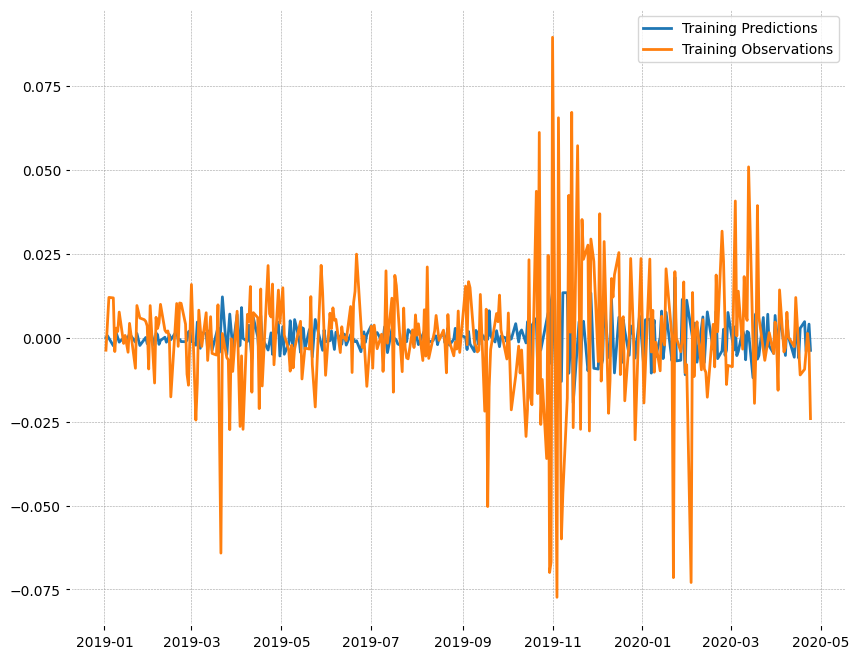

ARIMA Training Performance:
MSE: 0.00033681614455621453
RMSE: 0.018352551445404385
MAE: 0.012108029856723948



In [61]:
# Predicting and inverse transforming for training data
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')
train_predictions_inv_arima_ret = inverse_transform_predictions(train_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_train_inv_arima_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret)
plt.plot(dates_r_train, y_train_inv_arima_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_arima_ret, train_predictions_inv_arima_ret, "ARIMA Training")

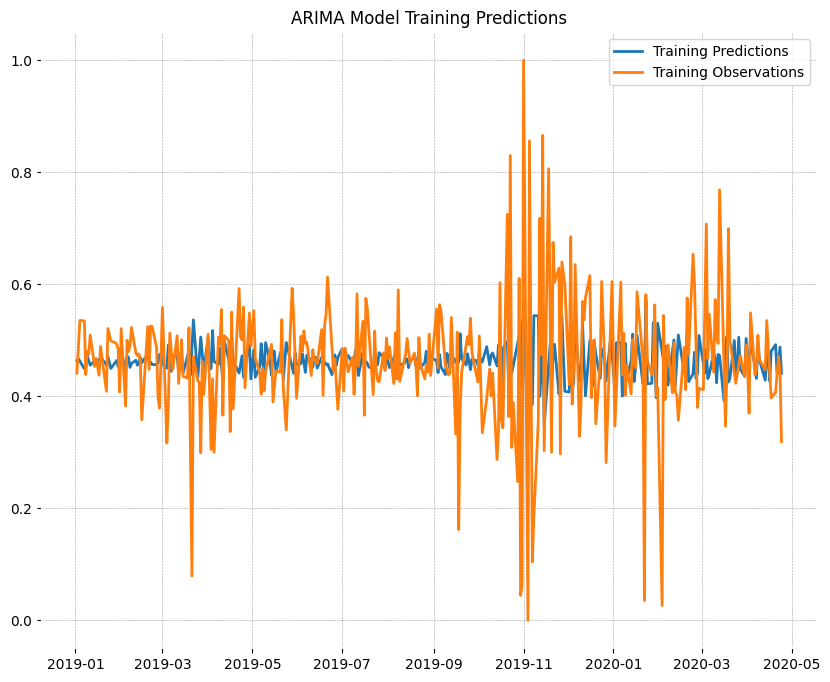

ARIMA Training Performance:
MSE: 0.012083825513857095
RMSE: 0.10992645502269731
MAE: 0.0725235836236782



In [62]:
# Predicting for training data without inverse transforming
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_arima_ret.values)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('ARIMA Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_arima_ret.values, "ARIMA Training")


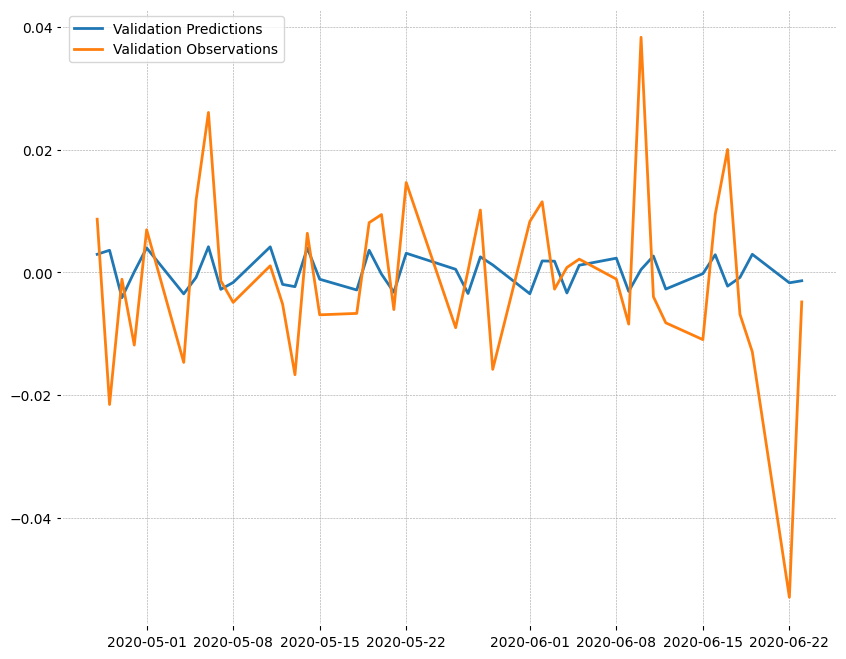

ARIMA Validation Performance:
MSE: 0.00019454275282072288
RMSE: 0.013947858359645142
MAE: 0.009852050665363302



In [63]:
# Validation predictions and evaluation
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean
val_predictions_inv_arima_ret = inverse_transform_predictions(val_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_val_inv_arima_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_arima_ret)
plt.plot(dates_r_val, y_val_inv_arima_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_arima_ret, val_predictions_inv_arima_ret, "ARIMA Validation")


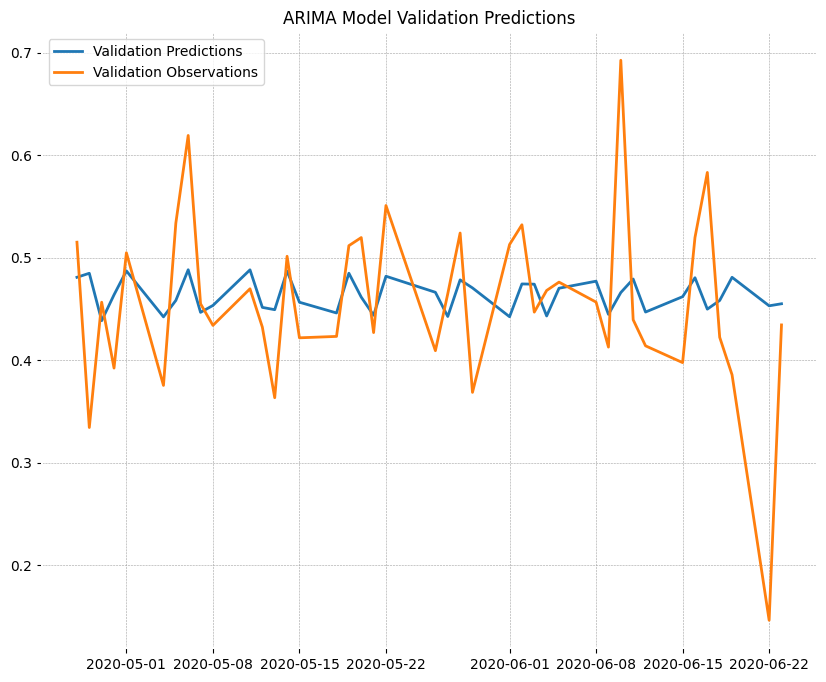

ARIMA Validation Performance:
MSE: 0.006979536812786875
RMSE: 0.08354362221490563
MAE: 0.05901092322607741



In [64]:
# Validation predictions and evaluation without inverse transforming
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_arima_ret.values)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('ARIMA Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_arima_ret.values, "ARIMA Validation")

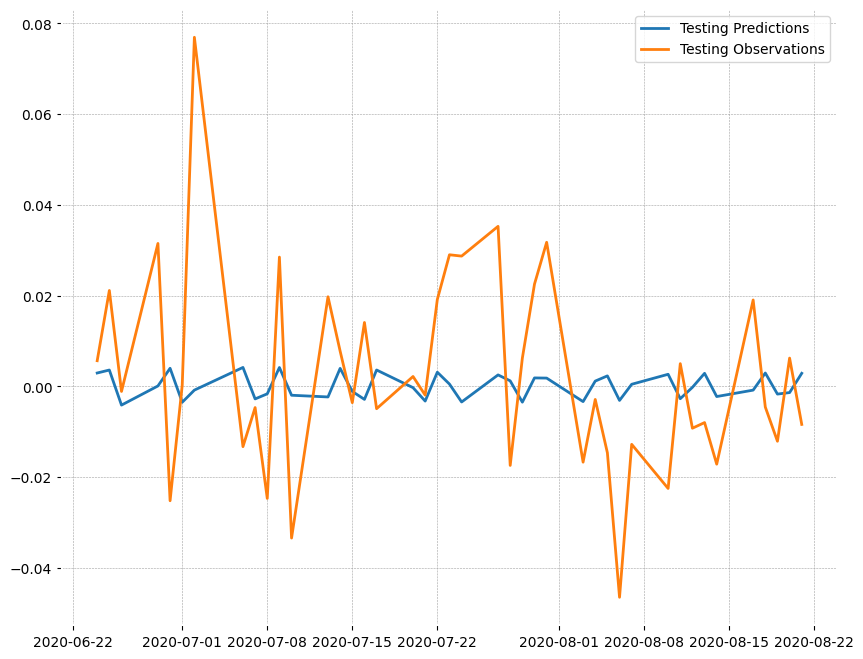

ARIMA Test Performance:
MSE: 0.0004962765320366898
RMSE: 0.02227726491373413
MAE: 0.017251466905016926



In [65]:
# Test predictions and evaluation
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean
test_predictions_inv_arima_ret = inverse_transform_predictions(test_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_test_inv_arima_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_arima_ret)
plt.plot(dates_r_test, y_test_inv_arima_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA Test")

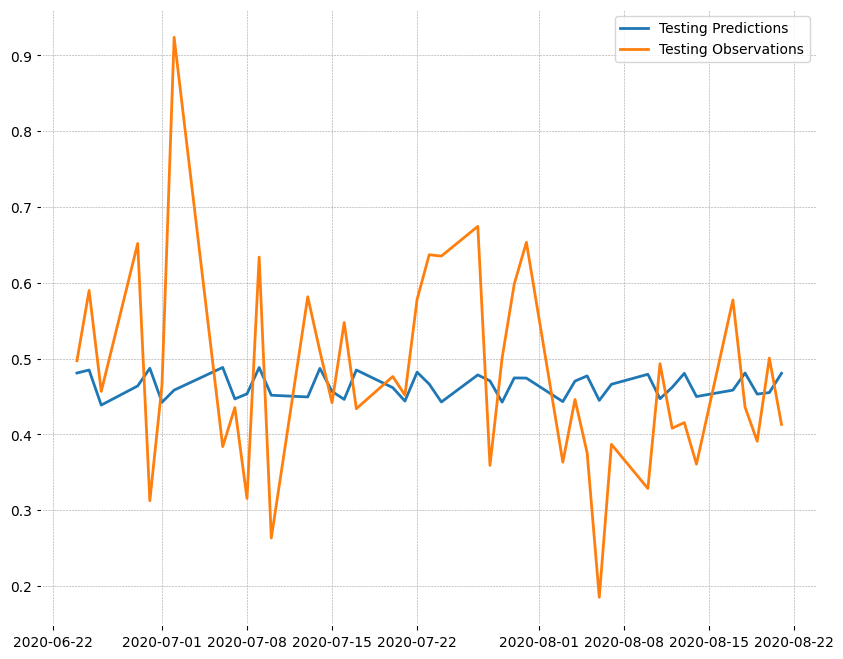

ARIMA Test Performance:
MSE: 0.01780472556520397
RMSE: 0.1334343492703583
MAE: 0.10333127829399247



In [66]:
# Test predictions and evaluation without inverse transforming
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_arima_ret.values)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_r_test, test_predictions_arima_ret.values, "ARIMA Test")

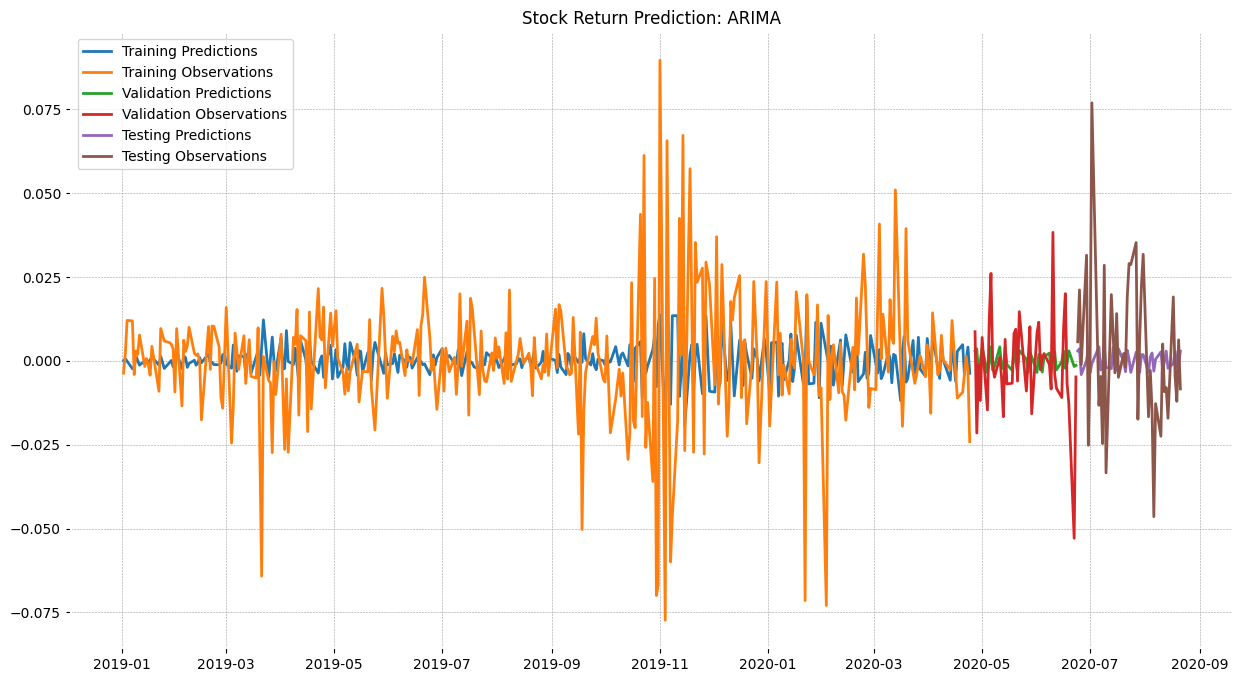

In [67]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_arima_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_arima_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_arima_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_arima_ret, label='Testing Observations')
plt.title('Stock Return Prediction: ARIMA')
plt.legend()
plt.show()

## LSTM Prediction

In [68]:
model_r = Sequential([layers.Input((time_step_r, X_r_train.shape[2])),
            layers.LSTM(256),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(1)
          ])
model_r.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model_r.fit(X_r_train, y_r_train, validation_data=(X_r_val, y_r_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - loss: 0.1102 - mean_absolute_error: 0.2898 - val_loss: 0.0142 - val_mean_absolute_error: 0.0946
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.0218 - mean_absolute_error: 0.1022 - val_loss: 0.0094 - val_mean_absolute_error: 0.0702
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 0.0154 - mean_absolute_error: 0.0852 - val_loss: 0.0080 - val_mean_absolute_error: 0.0658
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - loss: 0.0150 - mean_absolute_error: 0.0795 - val_loss: 0.0082 - val_mean_absolute_error: 0.0692
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 0.0166 - mean_absolute_error: 0.0833 - val_loss: 0.0080 - val_mean_absolute_error: 0.0671
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - loss: 0.0146 - mean_absolute_error: 0.0766 - val_loss: 0.0079 - val_mean_absolute_error: 0.0653
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0152 - mean_absolute_error: 0.0

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


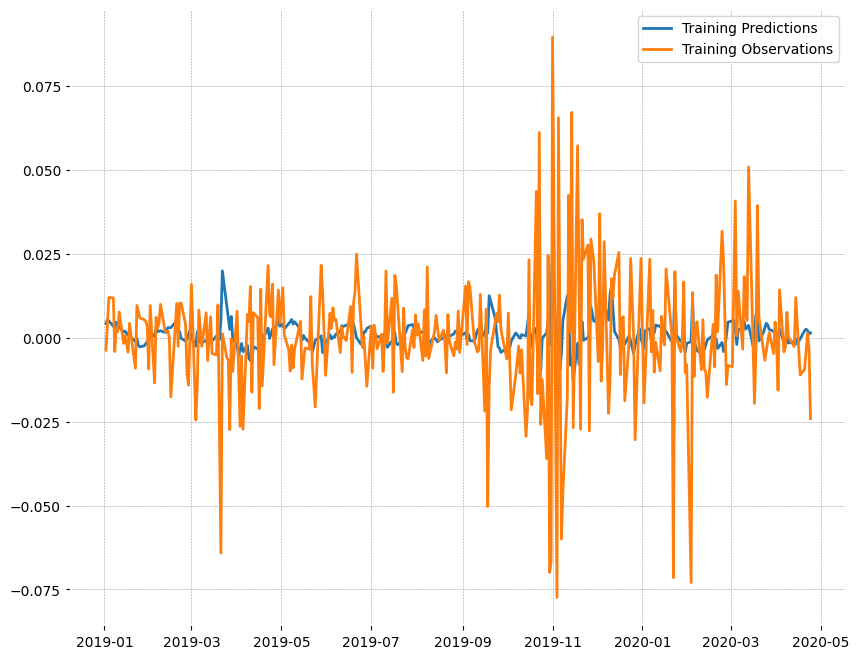

LSTM Training Performance:
MSE: 0.00034185521597966646
RMSE: 0.01848932708293264
MAE: 0.012335086794355306



In [69]:
# Predicting and inverse transforming for training data
train_predictions_ret = model_r.predict(X_r_train).flatten()
train_predictions_inv_ret = inverse_transform_predictions(train_predictions_ret, df_scaled_ret, scaler_ret)
y_train_inv_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_ret)
plt.plot(dates_r_train, y_train_inv_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_ret, train_predictions_inv_ret, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


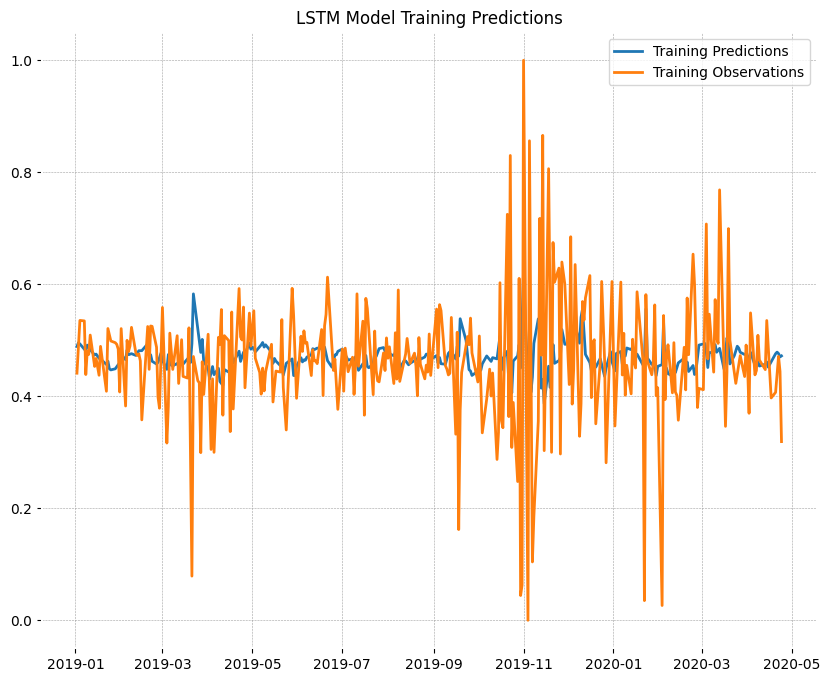

LSTM Training Performance:
MSE: 0.012264610268175602
RMSE: 0.11074569821357727
MAE: 0.07388358563184738



In [70]:
# Predicting for training data without inverse transforming
train_predictions_ret = model_r.predict(X_r_train).flatten()

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('LSTM Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_ret, "LSTM Training")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


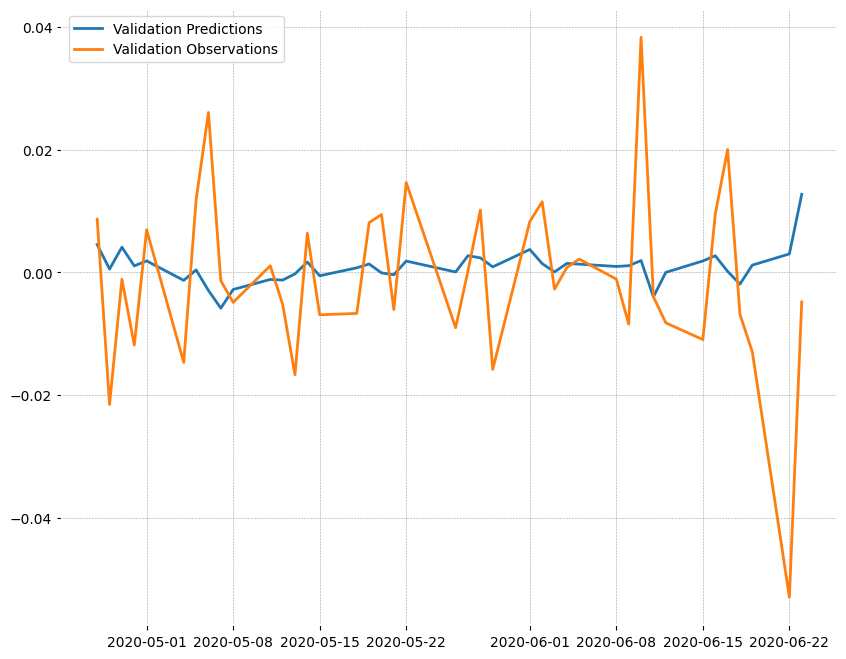

LSTM Validation Performance:
MSE: 0.0002180235287175533
RMSE: 0.01476561982165169
MAE: 0.010447513103807845



In [71]:
# Predicting and inverse transforming for validation data
val_predictions_ret = model_r.predict(X_r_val).flatten()
val_predictions_inv_ret = inverse_transform_predictions(val_predictions_ret, df_scaled_ret, scaler_ret)
y_val_inv_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_ret)
plt.plot(dates_r_val, y_val_inv_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_val_inv_ret, val_predictions_inv_ret, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


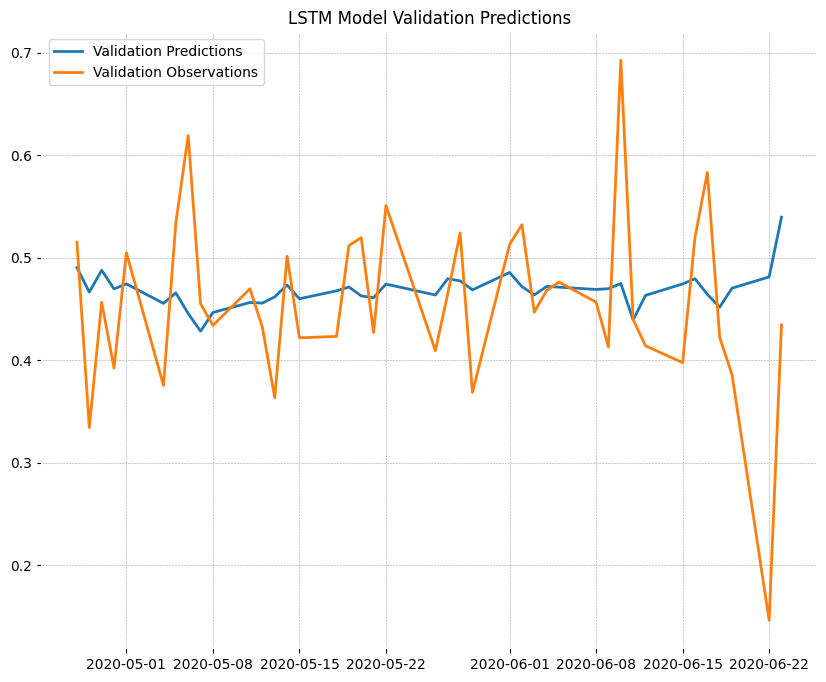

LSTM Validation Performance:
MSE: 0.007821948267519474
RMSE: 0.08844178169965744
MAE: 0.06257756799459457



In [72]:
# Predicting for validation data without inverse transforming
val_predictions_ret = model_r.predict(X_r_val).flatten()

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('LSTM Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_ret, "LSTM Validation")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 


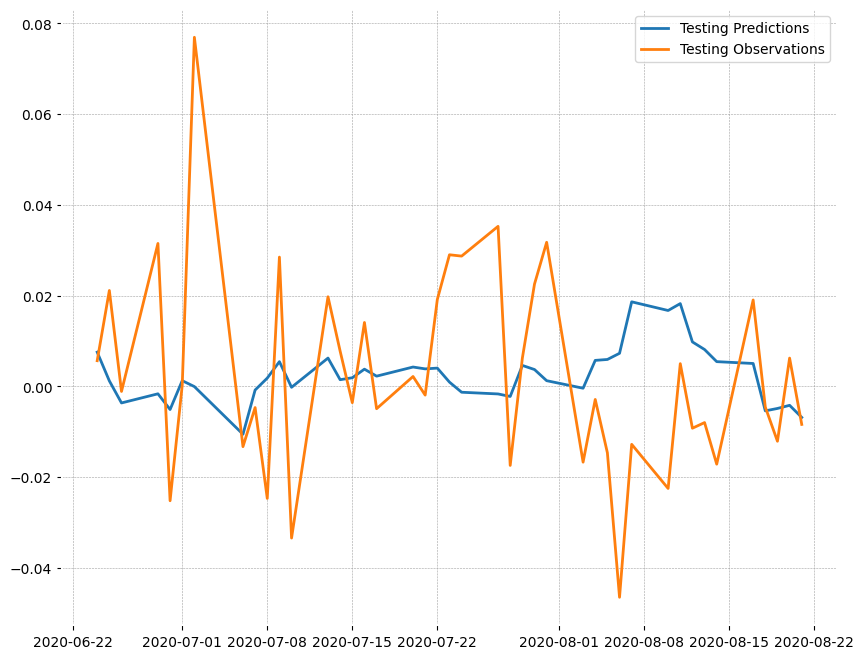

LSTM Testing Performance:
MSE: 0.0005541020802230214
RMSE: 0.023539372978544297
MAE: 0.01777204774947784



In [73]:
# Predicting and inverse transforming for testing data
test_predictions_ret = model_r.predict(X_r_test).flatten()
test_predictions_inv_ret = inverse_transform_predictions(test_predictions_ret, df_scaled_ret, scaler_ret)
y_test_inv_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_ret)
plt.plot(dates_r_test, y_test_inv_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


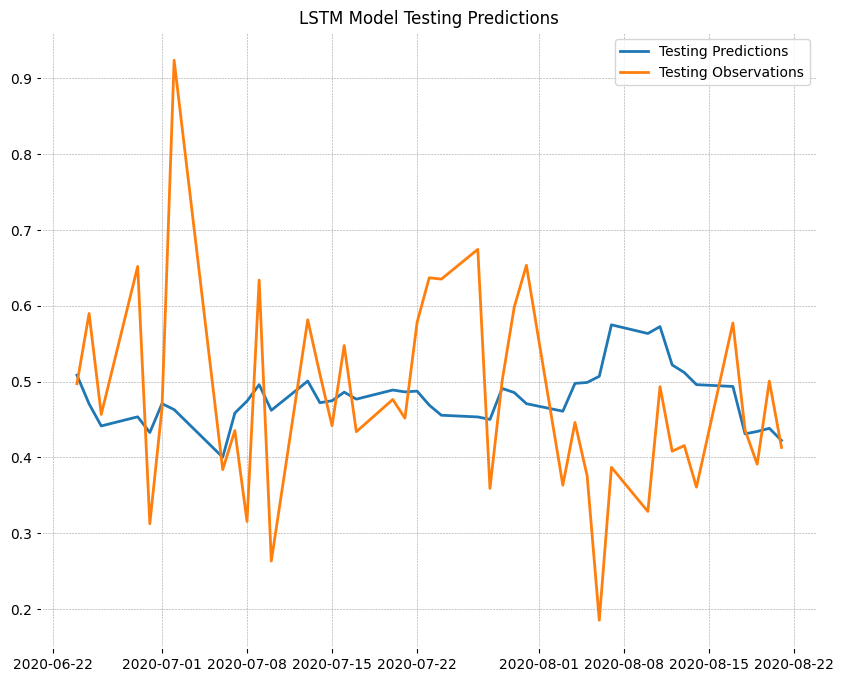

LSTM Testing Performance:
MSE: 0.019879311323165894
RMSE: 0.14099401235580444
MAE: 0.10644941031932831



In [74]:
# Predicting for testing data without inverse transforming
test_predictions_ret = model_r.predict(X_r_test).flatten()

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('LSTM Model Testing Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_ret, "LSTM Testing")


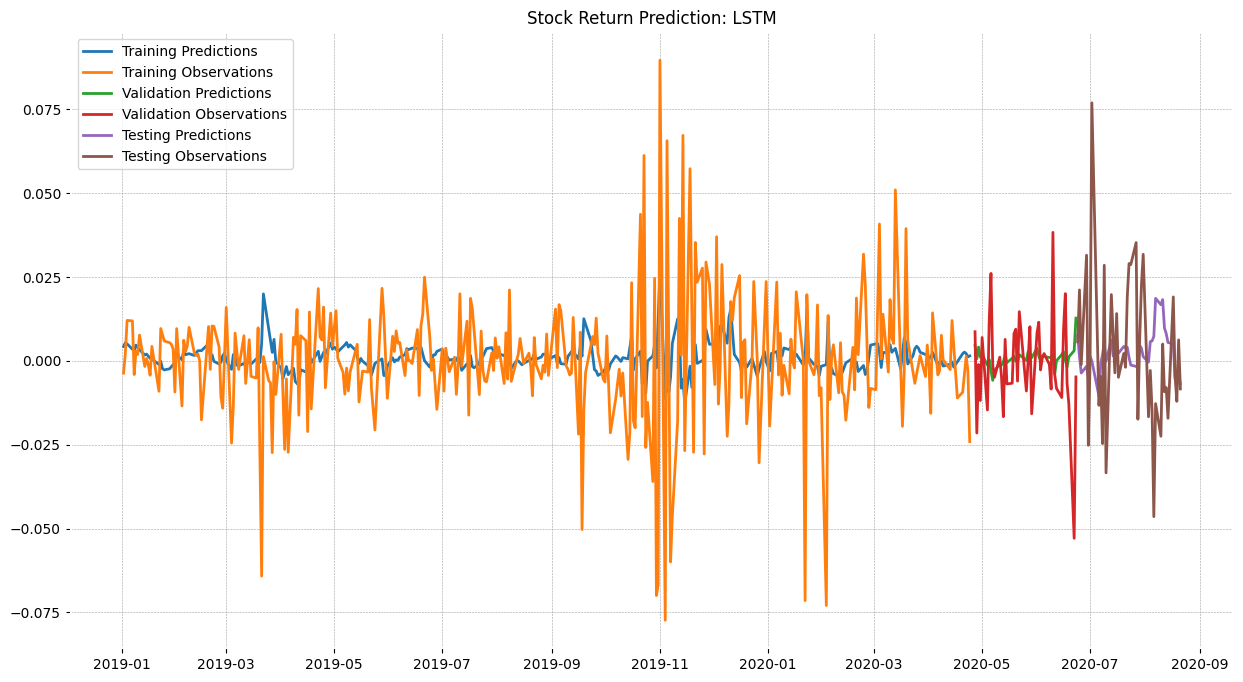

In [75]:
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.title('Stock Return Prediction: LSTM')
plt.legend()
plt.show()


## SVR Prediction

In [76]:
# Combine train and validation sets for hyperparameter tuning
X_r_train_val = np.concatenate((X_r_train, X_r_val))
y_r_train_val = np.concatenate((y_r_train, y_r_val))

# Reshape for GridSearchCV
X_r_train_val_flat = X_r_train_val.reshape(X_r_train_val.shape[0], -1)
X_r_test_flat = X_r_test.reshape(X_r_test.shape[0], -1)

In [77]:
from sklearn.svm import SVR
# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_r_train_val_flat, y_r_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


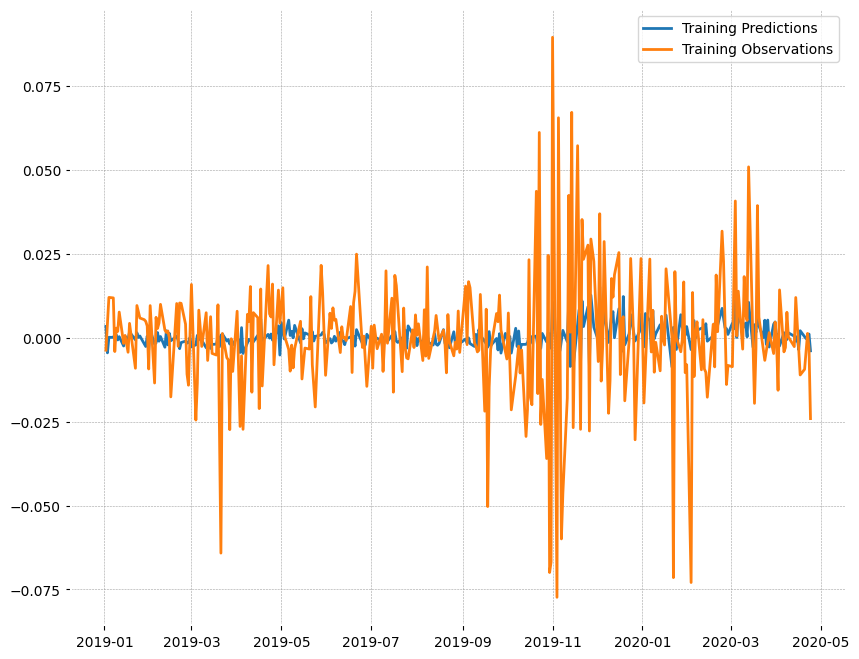

SVR Training Performance:
MSE: 0.0003104002317949546
RMSE: 0.01761817901472665
MAE: 0.011837909891317647



In [78]:
# Predicting and inverse transforming for training data
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))
train_predictions_inv_svr_ret = inverse_transform_predictions(train_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_train_inv_svr_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret)
plt.plot(dates_r_train, y_train_inv_svr_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_svr_ret, train_predictions_inv_svr_ret, "SVR Training")

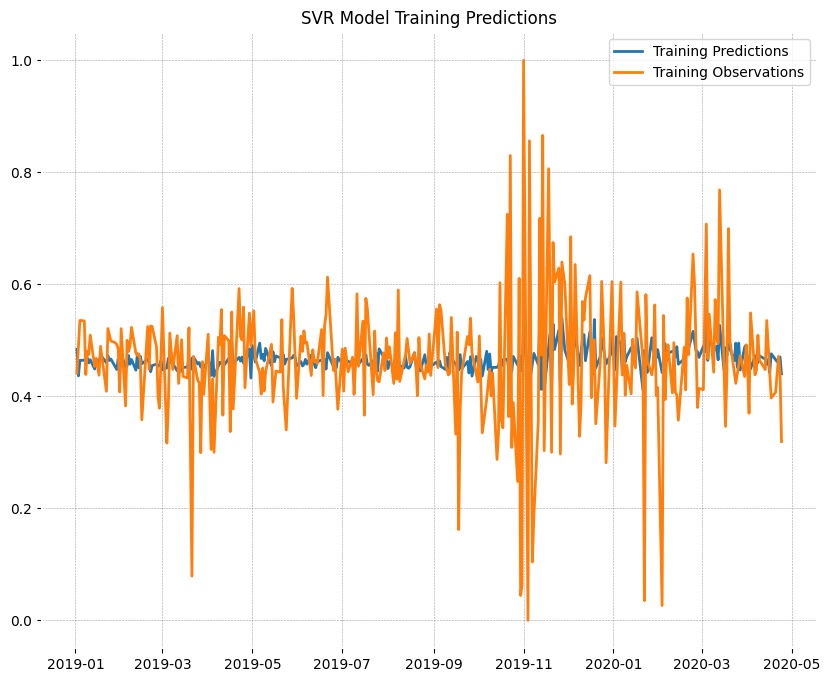

SVR Training Performance:
MSE: 0.011136111795986123
RMSE: 0.10552777736684367
MAE: 0.07090564345245456



In [79]:
# Predicting for training data without inverse transforming
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_svr_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_svr_ret, "SVR Training")


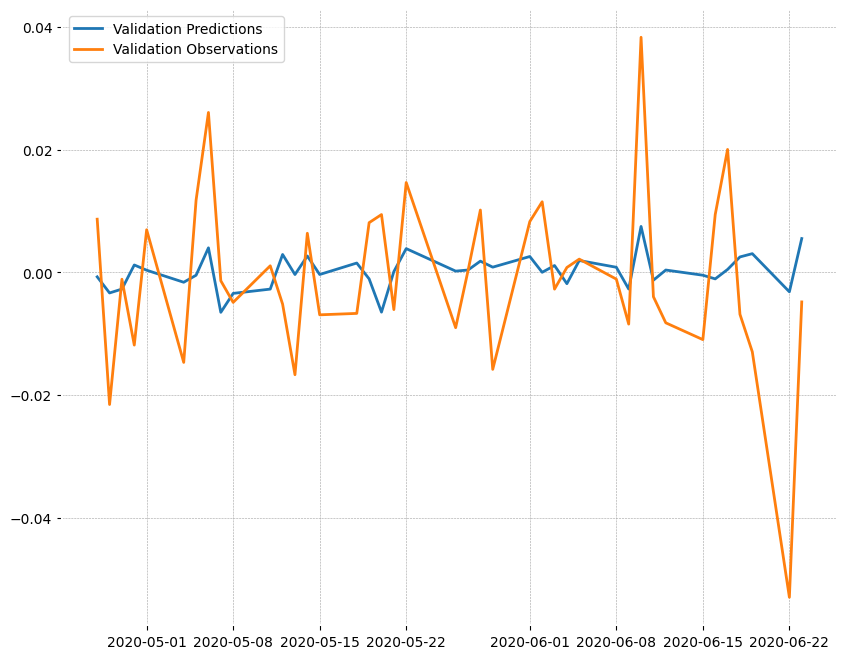

SVR Validation Performance:
MSE: 0.00018635376732900136
RMSE: 0.01365114527536065
MAE: 0.010372522218593576



In [80]:
# Validation predictions and evaluation
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))
val_predictions_inv_svr_ret = inverse_transform_predictions(val_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_val_inv_svr_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_svr_ret)
plt.plot(dates_r_val, y_val_inv_svr_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_svr_ret, val_predictions_inv_svr_ret, "SVR Validation")

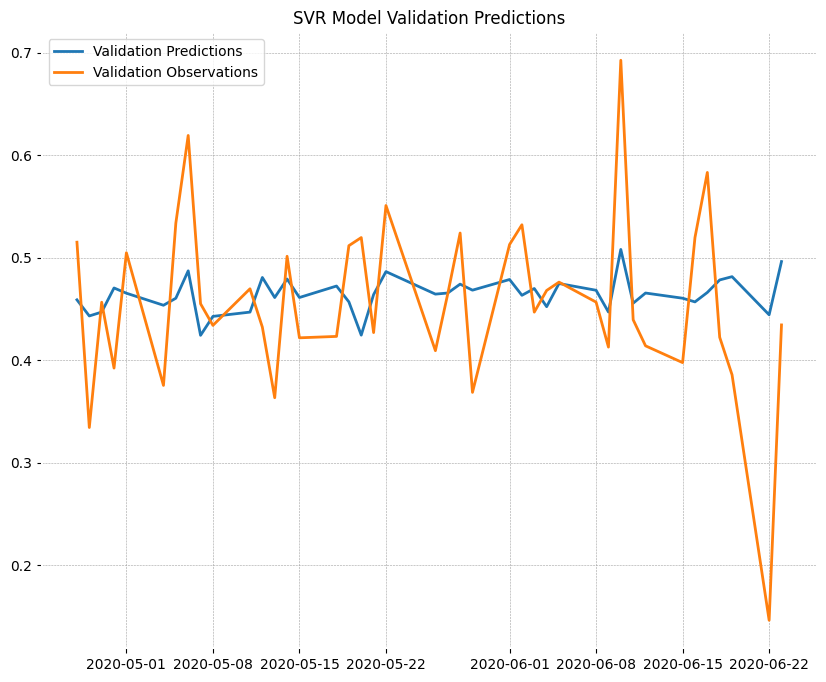

SVR Validation Performance:
MSE: 0.0066857436754423115
RMSE: 0.08176639698214855
MAE: 0.062128396725986204



In [81]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_svr_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_svr_ret, "SVR Validation")

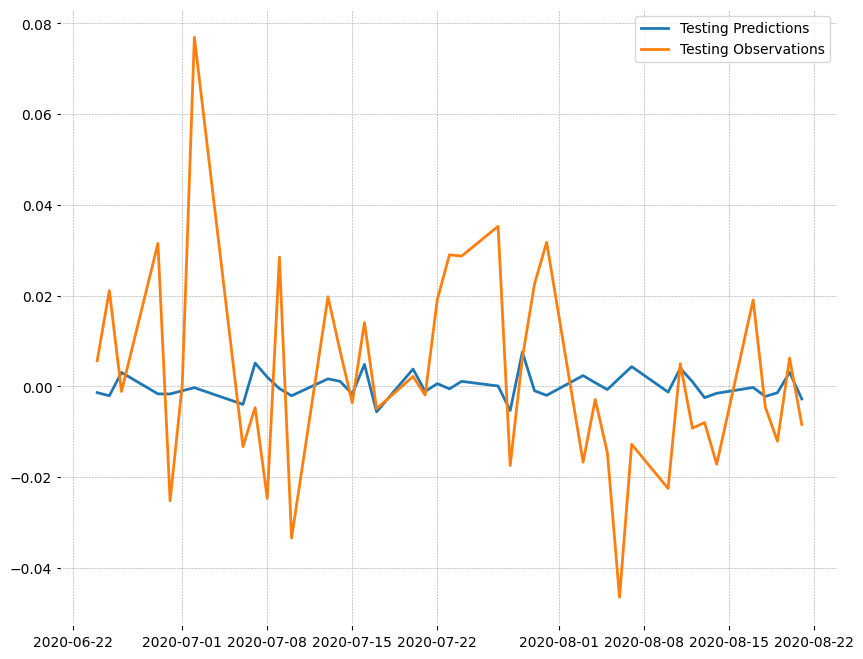

SVR Test Performance:
MSE: 0.0005003756945832504
RMSE: 0.022369078983794803
MAE: 0.016500107117278867



In [82]:
# Test predictions and evaluation
test_predictions_svr_ret = best_svr.predict((X_r_test.flatten().reshape(X_r_test.shape[0], -1)))
test_predictions_inv_svr_ret = inverse_transform_predictions(test_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_test_inv_svr_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_svr_ret)
plt.plot(dates_r_test, y_test_inv_svr_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR Test")

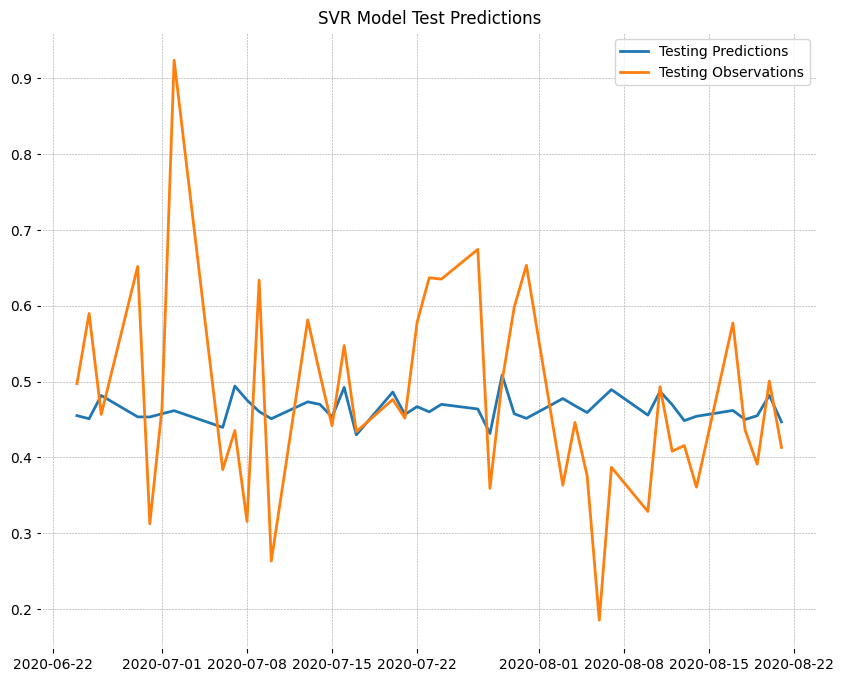

SVR Test Performance:
MSE: 0.017951789670550944
RMSE: 0.13398428889444816
MAE: 0.0988308513011378



In [83]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr_ret = best_svr.predict(X_r_test.flatten().reshape(X_r_test.shape[0], -1))

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_svr_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_svr_ret, "SVR Test")

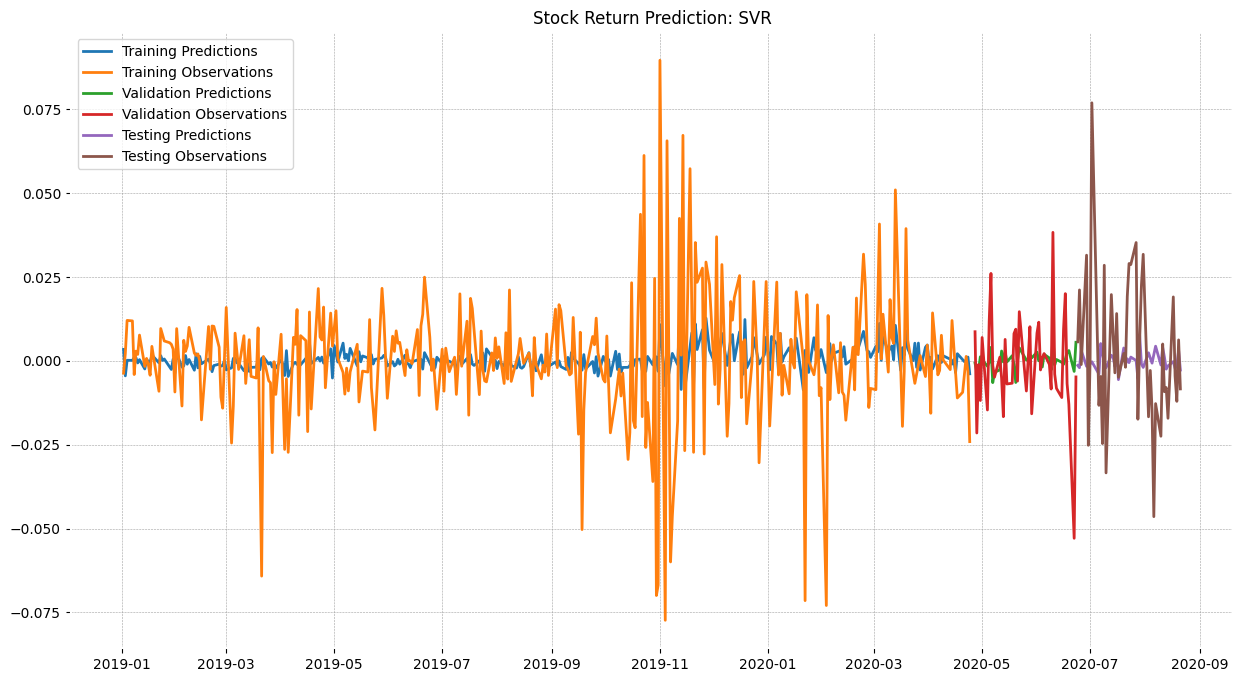

In [84]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_svr_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_svr_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_svr_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_svr_ret, label='Testing Observations')
plt.title('Stock Return Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 0.0004962765320366898
RMSE: 0.02227726491373413
MAE: 0.017251466905016926

SVR Performance:
MSE: 0.0005003756945832504
RMSE: 0.022369078983794803
MAE: 0.016500107117278867

LSTM Performance:
MSE: 0.0005541020802230214
RMSE: 0.023539372978544297
MAE: 0.01777204774947784



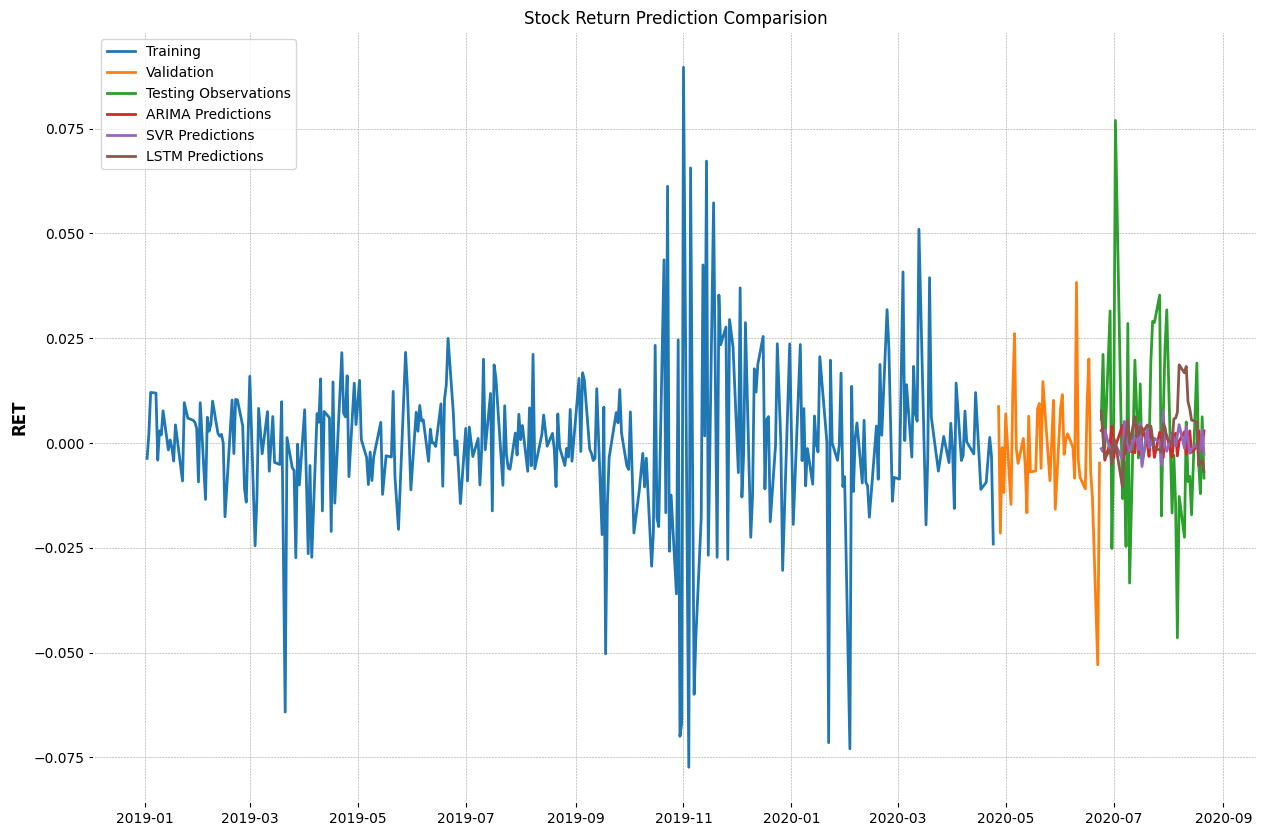

In [85]:
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA")
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR")
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM")


plt.figure(figsize=(15, 10))
plt.plot(dates_r_train, y_train_inv_ret, label='Training')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')


plt.title('Stock Return Prediction Comparision')
plt.legend()
plt.ylabel('RET')
plt.show()

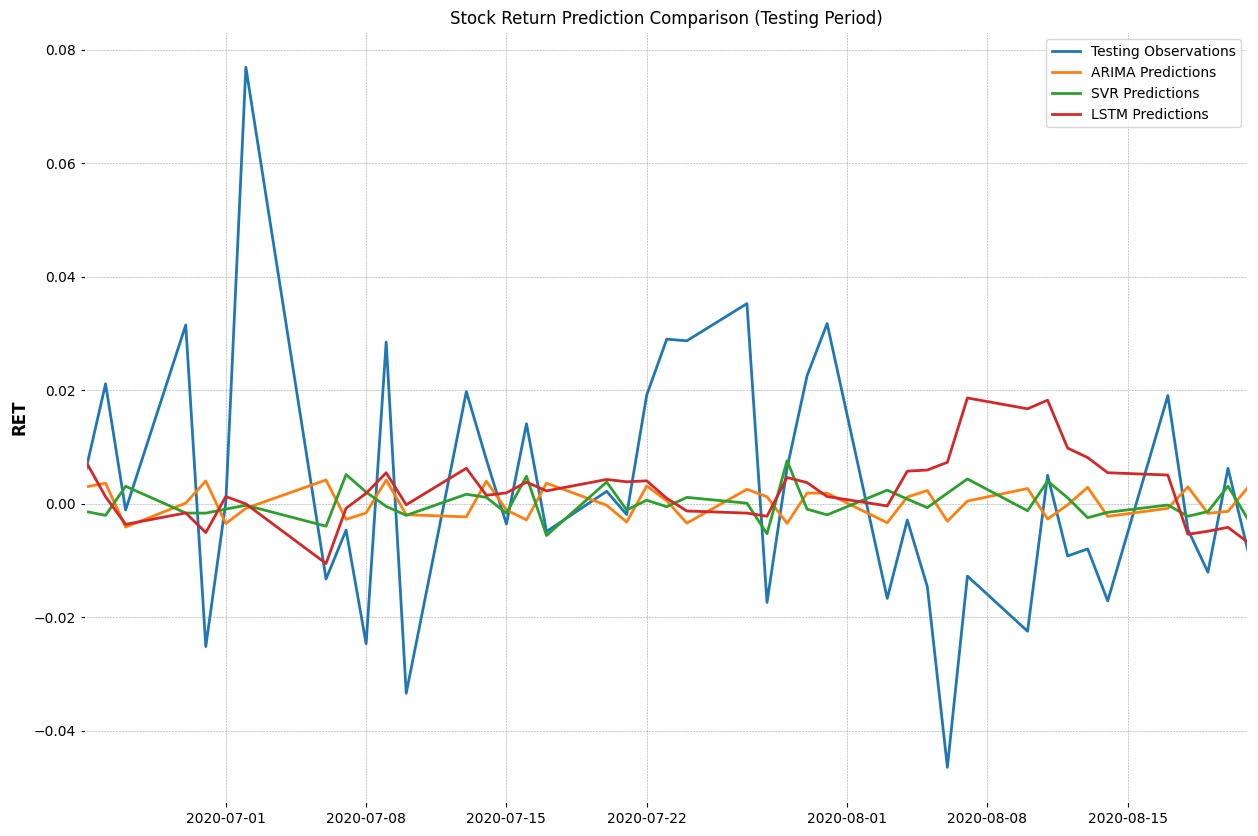

In [86]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')

plt.title('Stock Return Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('RET')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()